## Importing Packages and Libraries

In [236]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import scipy.stats as stats

sns.set(color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

import datetime
import scipy.stats as stats
from scipy.stats import norm
import pylab
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
# from statsmodels.formula.api import ols
# import statsmodels.stats.api as sms
# import statsmodels.api as sm
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Importing Dataset to Jupyter Notebooks

In [5]:
DataSet = pd.read_csv("D:\\McCombs Data Analytics Course\\Jupyter Notebook Files\\Proj 6 - Model Tuning\\BankChurners.csv")
Data = pd.read_csv("D:\\McCombs Data Analytics Course\\Jupyter Notebook Files\\Proj 6 - Model Tuning\\BankChurners.csv")

In [6]:
DataSet.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Problem Definition
### Credit Card Users Churn Prediction

<u><b> OBJECTIVE </b></u>
- Explore and visualize the dataset.<br>
- Data Preprocessing. <br>
- Logistic Regression Model Building. <br>
- Improving Model Perfomance and Regularization. <br>
- Bagging (bagging classifier, random forest, and decision tree.) and Boosting (Adaboost, gradient boost, xgboost, and stacking classifier) Model building. 
- Tune the 3 best models from above using Grid Search and Random Search (using Pipelining) <br>
- Build a classification model to predict if the customer is going to churn or not<br>
- Optimize the model using appropriate techniques<br>
- Model Performance Evaluation
- Generate a set of insights and recommendations. <br>


## Basic Information on the Attributes in the Initial DataSet

<u><b> TYPES OF ATTRIBUTES </b></u>

In [7]:
DataSet.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

There are 10 attributes of type INTEGER. <br>
There is 5 attributes of type FLOAT. <br>
There are 6 attributes of type OBJECT. <br>
TOTAL : 21 Attributes. <br>

<u><b> ANY MISSING VALUES IN THE DATASET? </b></u>

In [8]:
DataSet.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There are <b> NO </b> Missing values in the Dataset.<br>
However there are unknown values in 3 columns (Education_Level, Marital_Status, Income_Category) which will be dealt with in Data Preprocessing. 

In [9]:
DataSet.isin(['Unknown']).sum(axis=0)

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<u><b> SUMMARIZED DATASET </b></u>

In [10]:
DataSet.describe(include="all")

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,...,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,...,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,...,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,...,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,...,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,...,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


<u><b> DIMENSIONS OF THE  DATASET (ROWS AND COLUMNS) </b></u>

In [11]:
DataSet.shape

(10127, 21)

There are 10127 rows and 21 columns

<u><b> CORRELATIONS BETWEEN ATTRIBUTES </b></u>

In [12]:
DataSet.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


<u><b> SKEWNESS IN THE DATASET </b></u>

In [13]:
DataSet.skew()

CLIENTNUM                   0.995601
Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64

- Customer_Age, Dependent_count, Months_on_book, Total_Relationship_Count and Total_Revolving_Bal have NEGATIVE skew.
- Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt and Total_Ct_Chng_Q4_Q1 have high POSITIVE skew. 

## Data Pre-Processing I
<b> This part of Data Preprocessing is done to understand the DataSet better and for UNIVARIATE and BIVARIATE Exploratory Data Analysis. <br>Further Data Preprocessing will be done after EDA is complete.</b><br>

In [14]:
df = Data

#### STEP 1 : DROP UNNECESSARY COLUMNS
In this case; 
- <b>CLIENTNUM</b> column will not be used to make any deductions. Hence it shall be dropped. 


In [15]:
df.drop(['CLIENTNUM'],axis=1, inplace=True)
df.shape

(10127, 20)

The Number of columns has now reduced to 19.

#### STEP 2 : PROCESSING COLUMNS
In this case;

The Target Variable in further Model Building would be <b> Attrition_Flag </b>.<br>
Currently it is of OBJECT Type. We will be converting it to INTEGER Type for easier processing in later stages. <br>
Here, <br>
- <b>Existing Customer = 0 </b><br>
- <b>Attrited Customer = 1 </b><br>

In [16]:
df = df.replace({'Attrition_Flag' : { 'Existing Customer' : 0, 'Attrited Customer' : 1}})

In [17]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<b> Missing Value Treatment; Outlier Treatment; etc. will be dealt with in Data Preprocessing II</b>

## Univariate Analysis of Variables

<u><b> HISTOGRAM PLOT OF NUMERICAL VARIABLES TO SHOW DISTRIBUTION </b></u>

array([[<AxesSubplot:title={'center':'Attrition_Flag'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:>]], dtype=object)

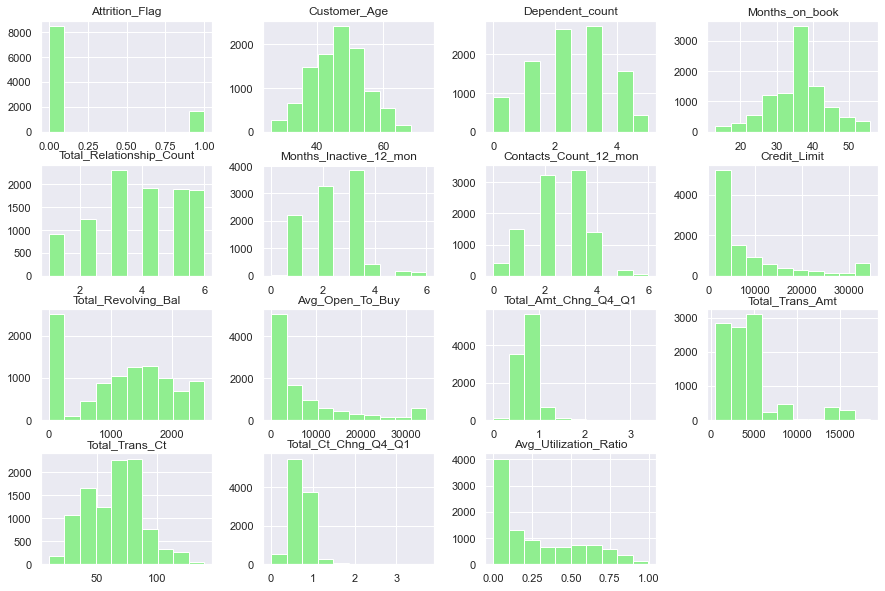

In [18]:
df.hist(figsize=(15,10), color = 'lightgreen')

Histogram Plots of the various numerical Attributes present in the given Dataset. It shows the frequency of each element within the attribute. <br>


<u><b> CUSTOMER AGE DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Customer_Age'>

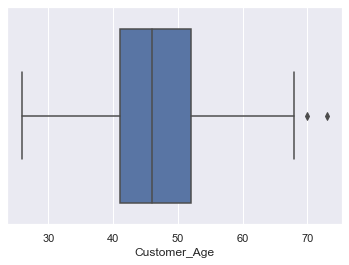

In [19]:
sns.boxplot(df['Customer_Age'])

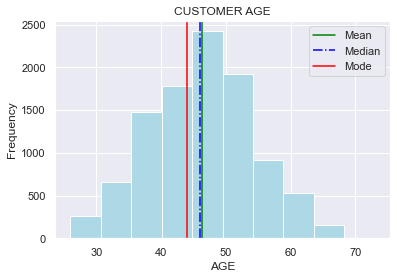

In [20]:
plt.hist(df['Customer_Age'], color = 'lightblue')
plt.axvline(df['Customer_Age'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Customer_Age'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Customer_Age'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title("CUSTOMER AGE")
plt.legend()

##### Observations
- Customer Age seems to be largely evenly distributed. 
- The Customer Age mean is seems to be around 46 - 47. Minimum Customer Age is 26 and Maximum Age is 70. There seems to be no discrepancy. 

<u><b> MONTHS ON BOOK DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Months_on_book'>

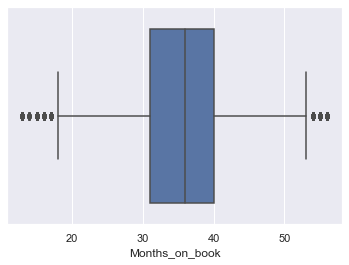

In [21]:
sns.boxplot(df['Months_on_book'])

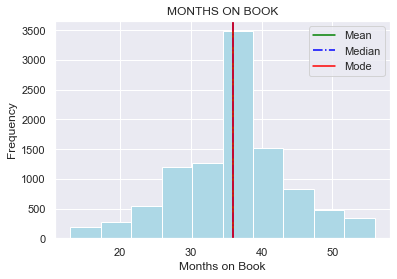

In [22]:
plt.hist(df['Months_on_book'], color = 'lightblue')
plt.axvline(df['Months_on_book'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Months_on_book'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Months_on_book'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Months on Book')
plt.ylabel('Frequency')
plt.title("MONTHS ON BOOK")
plt.legend()

##### Observations
- Mean = Median = Mode
- Most of the customers have almost 35 - 40 months on book. 
- Ranges from 10 - 60 months ****

<u><b> CREDIT LIMIT DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Credit_Limit'>

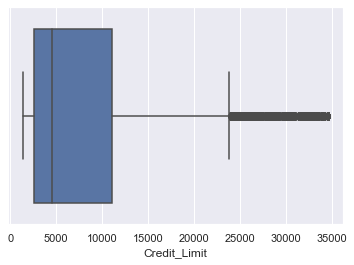

In [23]:
sns.boxplot(df['Credit_Limit'])

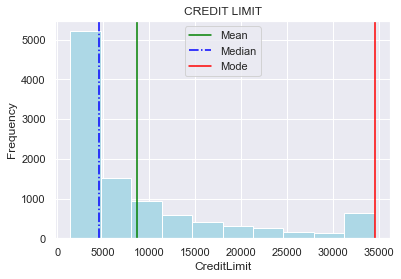

In [24]:
plt.hist(df['Credit_Limit'], color = 'lightblue')
plt.axvline(df['Credit_Limit'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Credit_Limit'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Credit_Limit'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('CreditLimit')
plt.ylabel('Frequency')
plt.title("CREDIT LIMIT")
plt.legend()

##### Observations
- Median < Mean < Mode
- Most of the customers are in the 0 - 5000 Credit Limit. 
- Ranges from 0 - 35000.

<u><b> TOTAL REVOLVING BALANCE DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Total_Revolving_Bal'>

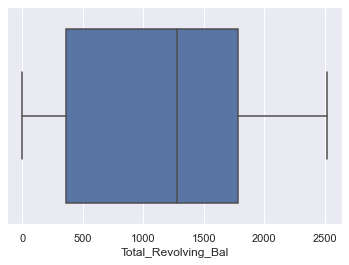

In [25]:
sns.boxplot(df['Total_Revolving_Bal'])

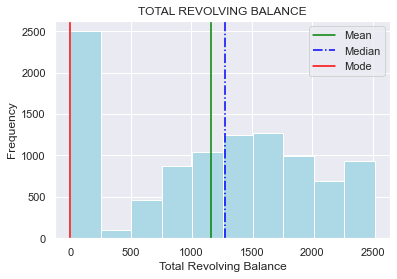

In [26]:
plt.hist(df['Total_Revolving_Bal'], color = 'lightblue')
plt.axvline(df['Total_Revolving_Bal'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Total_Revolving_Bal'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Total_Revolving_Bal'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Frequency')
plt.title("TOTAL REVOLVING BALANCE")
plt.legend()

##### Observations
- Mode < Mean < Median
- Most of the customers have a revolving balance of 0 - 250
- Ranges from 0 - 2500.

<u><b> AVG OPEN TO BUY DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Avg_Open_To_Buy'>

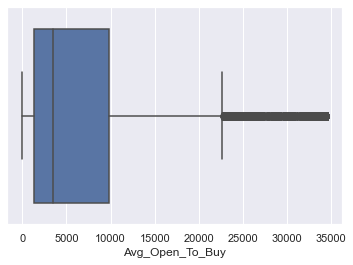

In [27]:
sns.boxplot(df['Avg_Open_To_Buy'])

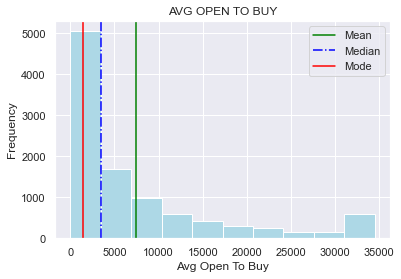

In [28]:
plt.hist(df['Avg_Open_To_Buy'], color = 'lightblue')
plt.axvline(df['Avg_Open_To_Buy'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Avg_Open_To_Buy'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Avg_Open_To_Buy'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Avg Open To Buy')
plt.ylabel('Frequency')
plt.title("AVG OPEN TO BUY")
plt.legend()

##### Observations
- Mode < Median < Mean
- Most of the customers are in the range 0 - 2500
- Number of customers decreases as the average open to buy amount increases. 

<u><b> TOTAL AMOUNT CHANGE Q4 - Q1</b></u>

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1'>

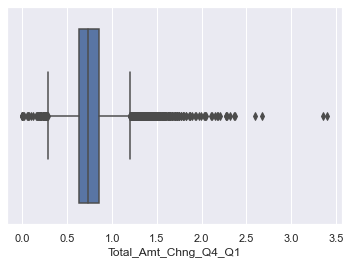

In [29]:
sns.boxplot(df['Total_Amt_Chng_Q4_Q1'])

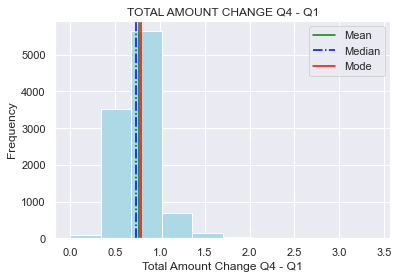

In [30]:
plt.hist(df['Total_Amt_Chng_Q4_Q1'], color = 'lightblue')
plt.axvline(df['Total_Amt_Chng_Q4_Q1'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Total_Amt_Chng_Q4_Q1'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Total_Amt_Chng_Q4_Q1'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Total Amount Change Q4 - Q1')
plt.ylabel('Frequency')
plt.title("TOTAL AMOUNT CHANGE Q4 - Q1")
plt.legend()

##### Observations
- Large Number of Outliers
- The value is the ratio of Transaction Amt in Q4 to Q1. Since the Mean is less than 1, we can say that people transactless in Q4 than in Q1

<u><b> TOTAL COUNT CHANGE Q4 - Q1</b></u>

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1'>

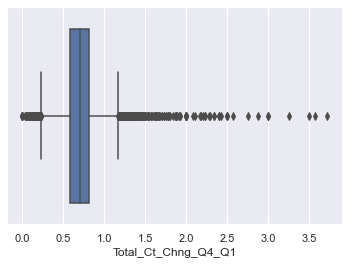

In [31]:
sns.boxplot(df['Total_Ct_Chng_Q4_Q1'])

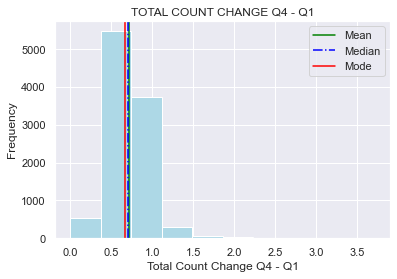

In [32]:
plt.hist(df['Total_Ct_Chng_Q4_Q1'], color = 'lightblue')
plt.axvline(df['Total_Ct_Chng_Q4_Q1'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Total_Ct_Chng_Q4_Q1'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Total_Ct_Chng_Q4_Q1'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Total Count Change Q4 - Q1')
plt.ylabel('Frequency')
plt.title("TOTAL COUNT CHANGE Q4 - Q1")
plt.legend()

##### Observations
- Large Number of Outliers
- The value is the ratio of Transaction Counts in Q4 to Q1. Since the Mean is less than 1, we can say that people transact less in Q4 than in Q1

<u><b> TOTAL TRANSACTION AMOUNT </b></u>

<AxesSubplot:xlabel='Total_Trans_Amt'>

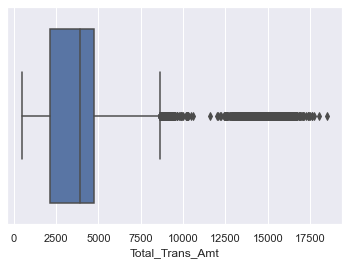

In [33]:
sns.boxplot(df['Total_Trans_Amt'])

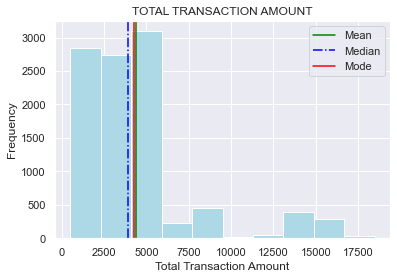

In [34]:
plt.hist(df['Total_Trans_Amt'], color = 'lightblue')
plt.axvline(df['Total_Trans_Amt'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Total_Trans_Amt'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Total_Trans_Amt'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.title("TOTAL TRANSACTION AMOUNT")
plt.legend()

##### Observations
- Large Number of Outliers
- Most Customers have transaction amounts ranging from 0 - 5000.
- Customers having Transaction Amount in the range of 5000 - 17500 account for the large number of outliers. 

<u><b> TOTAL TRANSACTION COUNT </b></u>

<AxesSubplot:xlabel='Total_Trans_Ct'>

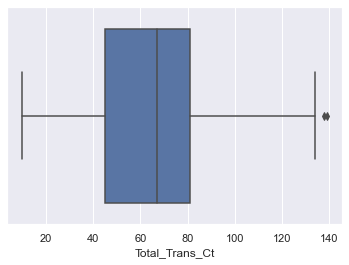

In [35]:
sns.boxplot(df['Total_Trans_Ct'])

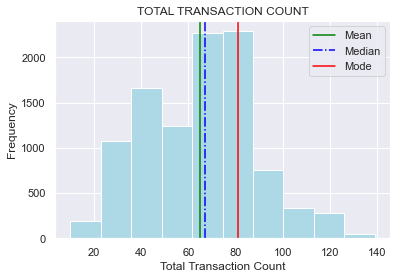

In [36]:
plt.hist(df['Total_Trans_Ct'], color = 'lightblue')
plt.axvline(df['Total_Trans_Ct'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Total_Trans_Ct'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Total_Trans_Ct'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Total Transaction Count')
plt.ylabel('Frequency')
plt.title("TOTAL TRANSACTION COUNT")
plt.legend()

##### Observations
- Fairly distributed with less number of outliers.
- On an average there are 60 - 65 transactions a year for a customer.#

<u><b> AVERAGE UTILIZATION RATIO </b></u>

<AxesSubplot:xlabel='Avg_Utilization_Ratio'>

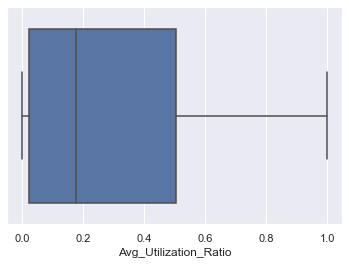

In [37]:
sns.boxplot(df['Avg_Utilization_Ratio'])

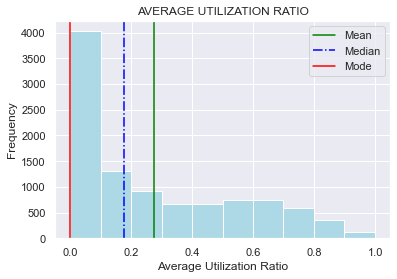

In [38]:
plt.hist(df['Avg_Utilization_Ratio'], color = 'lightblue')
plt.axvline(df['Avg_Utilization_Ratio'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Avg_Utilization_Ratio'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Avg_Utilization_Ratio'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Frequency')
plt.title("AVERAGE UTILIZATION RATIO")
plt.legend()

##### Observations
- No Outliers.
- A very large chunk of the population has an avg utilization ratio in the range of 0 - 0.1; showing that a large chunk of the population does not spend the available credit. 

<u><b> ATTRITION FLAG DISTRIBUTION </b></u>

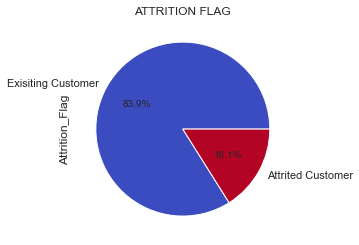

In [39]:
df1 = df['Attrition_Flag'].value_counts()
label1 = ['Exisiting Customer','Attrited Customer']
df1.plot.pie(cmap = 'coolwarm', autopct='%2.1f%%',radius=1, labels=label1)
plt.title("ATTRITION FLAG")
plt.show()

##### Observations
- Almost 84% of the dataset is existing customers.
- Only 16% are Attrited Customer (i.e.: Customers have left.)
- The Attriton Flag Distribution is highly imbalanced (Skewed)

<u><b> GENDER DISTRIBUTION </b></u>

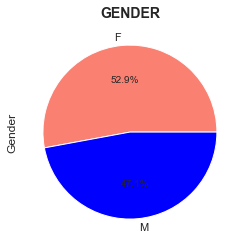

In [40]:
df2 = df['Gender'].value_counts()
clr2 = ['salmon','blue']
df2.plot.pie(colors=clr2,autopct='%2.1f%%',radius=1)
plt.title('GENDER', fontsize=14, fontweight='bold');


##### Observations
- Gender seem to be a balanced column, with 53% Female and 47% Male Customers. *

<u><b> DEPENDENT COUNT DISTRIBUTION </b></u>

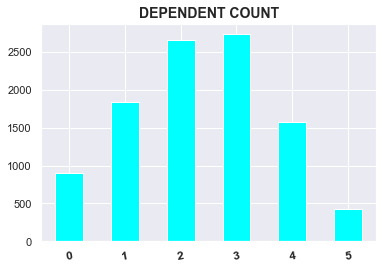

In [41]:
df3 = df['Dependent_count'].value_counts().sort_index()
df3.plot.bar(color='cyan')
plt.title('DEPENDENT COUNT', fontsize=14, fontweight='bold');
plt.xticks(fontsize=12, fontweight='bold', rotation=10);

##### Observations
- Over 5000 customers have 2 - 3 dependents making up a large chunk of the dataset. 
- Very few customers (less than 500) have 5 dependents.


<u><b> EDUCATION LEVEL DISTRIBUTION </b></u>

Text(0, 0.5, '')

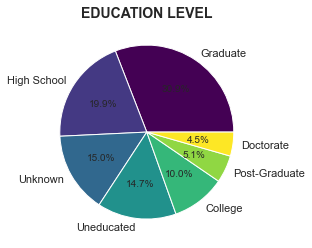

In [42]:
df3 = df['Education_Level'].value_counts()
df3.plot.pie(cmap='viridis',autopct='%2.1f%%',radius=1,)
plt.title('EDUCATION LEVEL', fontsize=14, fontweight='bold');
plt.ylabel(None)

##### Observations
- Almost 50% of the dataset constitutes of Graduates and High School Diploma Customers of which Graduates account for the largest chunk. 
- Less than 10% of the dataset makes up of customers with Doctorates and Post-Graduated Degrees. 
- 15% of the customers have not provided any information on their education level. **

<u><b> MARITAL STATUS DISTRIBUTION </b></u>

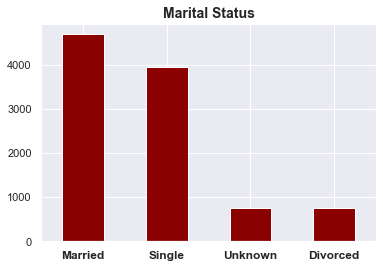

In [43]:
df4 = df['Marital_Status'].value_counts()
df4.plot.bar(color='darkred')
plt.title('Marital Status', fontsize=14, fontweight='bold');
plt.xticks(np.arange(0,4),['Married', 'Single','Unknown','Divorced'], fontsize=12, fontweight='bold', rotation = 0);

##### Observations
- Most of the users are either Married (4500+) or Single (~4000).
- Very few customers are divorced. 
- Few Customers have not provided info on their Marital Status. **

<u><b> INCOME CATEGORY DISTRIBUTION </b></u>

Text(0, 0.5, '')

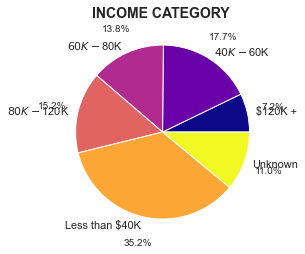

In [44]:
df5 = df['Income_Category'].value_counts().sort_index()
df5.plot.pie(cmap='plasma',autopct='%2.1f%%',pctdistance = 1.3,radius=1)
plt.title('INCOME CATEGORY ', fontsize=14, fontweight='bold');
plt.ylabel(None)

##### Observations
- Almost 50% of the DataSet earns less than 60K Dollars. 
- Very small percentage of the dataset earns more than 120K Dollars.
- Few Customers have not provided info on their Income. **

<u><b> CARD CATEGORY DISTRIBUTION </b></u>

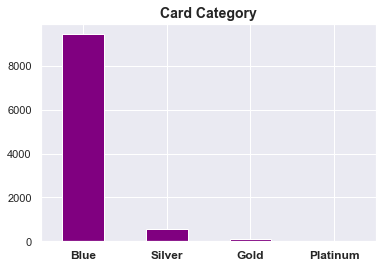

In [45]:
df6 = df['Card_Category'].value_counts()
df6.plot.bar(color='purple')
plt.title('Card Category', fontsize=14, fontweight='bold');
plt.xticks(np.arange(0,4),['Blue', 'Silver','Gold','Platinum'], fontsize=12, fontweight='bold', rotation = 0);

##### Observations
- Most of the users belong to the Blue Category. ***
- Negligible number of customers have the Platinum Category of Credit Cards. 
- Very few customers have Silver or Gold Category of Credit Cards. 

<u><b> TOTAL RELATIONSHIP COUNT DISTRIBUTION </b></u>

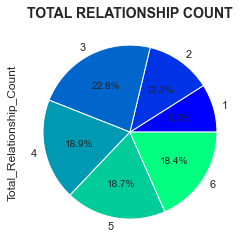

In [46]:
df7 = df['Total_Relationship_Count'].value_counts().sort_index()
df7.plot.pie(cmap='winter',autopct='%2.1f%%',radius=1)
plt.title('TOTAL RELATIONSHIP COUNT', fontsize=14, fontweight='bold');

##### Observations
- 3 is the highest relationship count for the customers in the dataset. 
- Mostly seems to be evenly distributed. 

<u><b> MONTHS INACTIVE DISTRIBUTION </b></u>

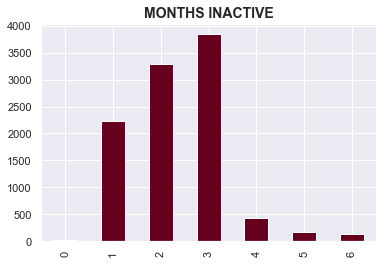

In [47]:
df8 = df['Months_Inactive_12_mon'].value_counts().sort_index()
df8.plot.bar(cmap="RdBu")
plt.title('MONTHS INACTIVE', fontsize=14, fontweight='bold');
plt.xlabel('', fontsize=12, fontweight='bold');

##### Observations
- Months Inactive ranges from 0 - 6 months. 
- Most customers have 3 month of inactivity followed by 2 and then 1. *****

<u><b> CONTACTS COUNT DISTRIBUTION </b></u>

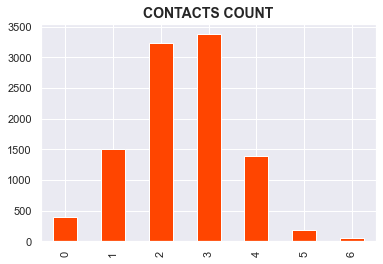

In [48]:
df9 = df['Contacts_Count_12_mon'].value_counts().sort_index()
df9.plot.bar(color="orangered")
plt.title('CONTACTS COUNT', fontsize=14, fontweight='bold');
plt.xlabel('', fontsize=12, fontweight='bold');

##### Observations
- Contacts Count ranges from 0 - 6. 
- Most customers have 3 contacts followed by 2 and then 1. *****

## Bivariate and Multivariate Analysis of Variables

<u><b> HEAT MAP SHOWING CORRELATION BETWEEN VARIABLES </b></u>

<AxesSubplot:>

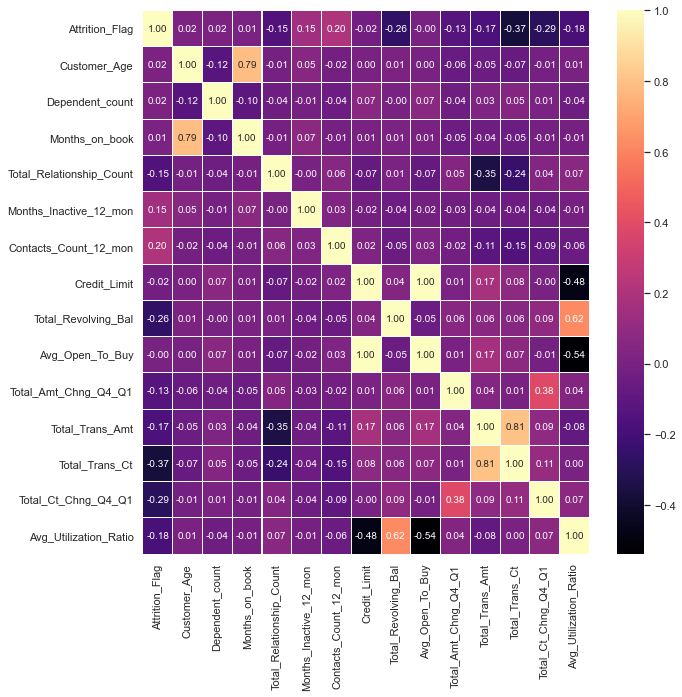

In [49]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), ax=ax, annot = True, linewidths = 0.05, fmt = '.2f', cmap="magma")

##### Observations
This Heat Map shows the correlation between the individual attributes. There is distributed correlation between the attributes of this dataset. With this we can draw the following inferences : 
- <b> HIGH CORRELATION : </b> Months_on_book and Customer_Age, Avg_Open_To_Buy and Credit_Limit.
- <b> MEDIUM CORRELATION : </b> Avg_Utilization_Ratio and Total_Revolving_Bal
- <b> LOW CORRELATION : </b> All Other Attributes

<u><b> EDUCATION LEVEL v/s CREDIT LIMIT v/s ATTRITION FLAG </b></u>

[Text(0, 0, 'High School'),
 Text(1, 0, 'Graduate'),
 Text(2, 0, 'Uneducated'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'College'),
 Text(5, 0, 'Post-Graduate'),
 Text(6, 0, 'Doctorate')]

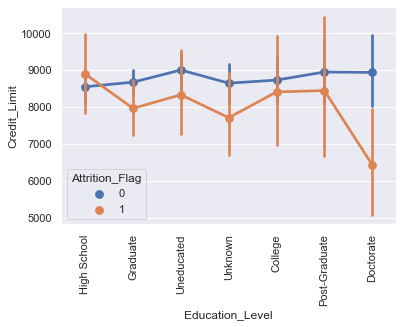

In [54]:
plot1 = sns.pointplot(df['Education_Level'],df['Credit_Limit'],hue = df['Attrition_Flag'])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, horizontalalignment='center')

##### Observations
- In the general sense, the credit limit is higher for existing cutsomers than for attrited customers except in the case of customers with high school degrees only where the opposite happens. 
- The credit limit does not have a huge difference between the existing cutsomers and attrited customers for varying levels of education, except for customers with a doctorate; where the difference is high. 

<u><b> TOTAL REVOLVING BALANCE v/s ATTRITION FLAG </b></u>

Text(0.5, 1.0, 'Attrition Flag v/s Total Revolving Balance')

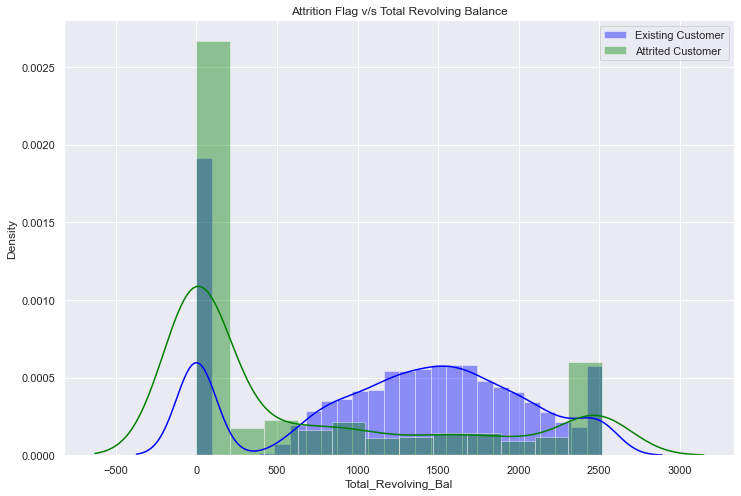

In [56]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Attrition_Flag'] == 0]['Total_Revolving_Bal'],kde=True, color='blue', label='Existing Customer')
sns.distplot(df[df['Attrition_Flag'] == 1]['Total_Revolving_Bal'],kde=True, color='green',label='Attrited Customer')
plt.legend()
plt.title("Attrition Flag v/s Total Revolving Balance")

##### Observations
- Total Revolving Balance in the 0 - 500 range has a higher number of Attrited Customers than Existing Customers. 
- This changes as the Total Revoloving Balance increases with the number of Existing Customers taking over the Attrited ones. Therefore Existing Customers have a mugh higher Total Revolving Balance than attrited ones.
- As the Total Revolving Balance further increases to 2500, the number of Existing customers and Attrited customers in this range equalizes. 

<u><b> MARITAL STATUS v/s DEPENDENT COUNT </b></u>

Text(0.5, 1.0, 'Marital Status v/s Dependent Count')

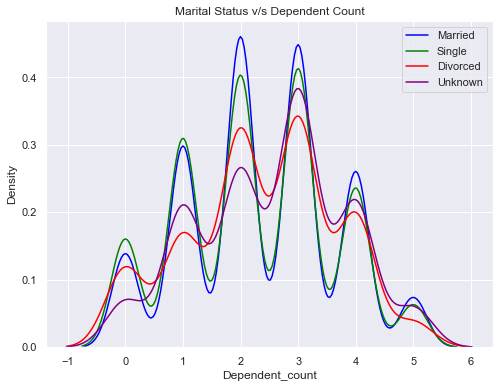

In [57]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['Marital_Status'] == "Married"]['Dependent_count'],kde=True,hist = False, color='blue', label='Married')
sns.distplot(df[df['Marital_Status'] == "Single"]['Dependent_count'],kde=True, hist = False,color='green',label='Single')
sns.distplot(df[df['Marital_Status'] == "Divorced"]['Dependent_count'],kde=True, hist = False,color='red', label='Divorced')
sns.distplot(df[df['Marital_Status'] == "Unknown"]['Dependent_count'],kde=True, hist = False,color='purple',label='Unknown')

plt.legend()
plt.title("Marital Status v/s Dependent Count")

##### Observations
Customers of different Marital Statuses arranged in Descending order with respect to their Dependent counts : 
- 0 Dependents : Single > Married > Divorced > Unknown
- 1 Dependents : Single > Married > Unknown > Divorced
- 2 Dependents : Married > Single > Divorced > Unknown
- 3 Dependents : Married > Single > Unknown > Divorced
- 4 Dependents : Married > Single > Unknown > Divorced
- 5 Dependents : Married > Single = Unknown > Divorced

GENERAL : Married Customers ahve the most dependents and Divorced Customers have the least. 

<u><b> GENDER v/s ATTRITION FLAG </b></u>

<Figure size 720x432 with 0 Axes>

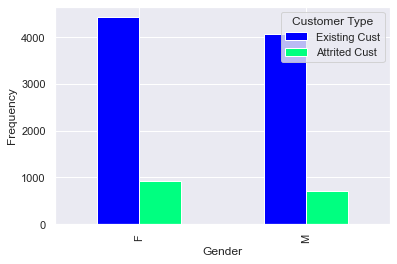

In [58]:
fig = plt.figure(figsize = (10,6))
tab1 = pd.crosstab(df['Gender'],df['Attrition_Flag'])
tab1.plot.bar(cmap = "winter")
plt.ylabel("Frequency")
plt.legend(['Existing Cust', 'Attrited Cust'],loc = "upper right", title="Customer Type")

##### Observations
- The existing and attrited customer values for both genders is more or less the same with Females leading both categories only by a very small margin. 

<u><b> ATTRITION FLAG v/s OTHER VARIABLES </b></u>

In [59]:
chk1 = ['Gender','Dependent_count','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

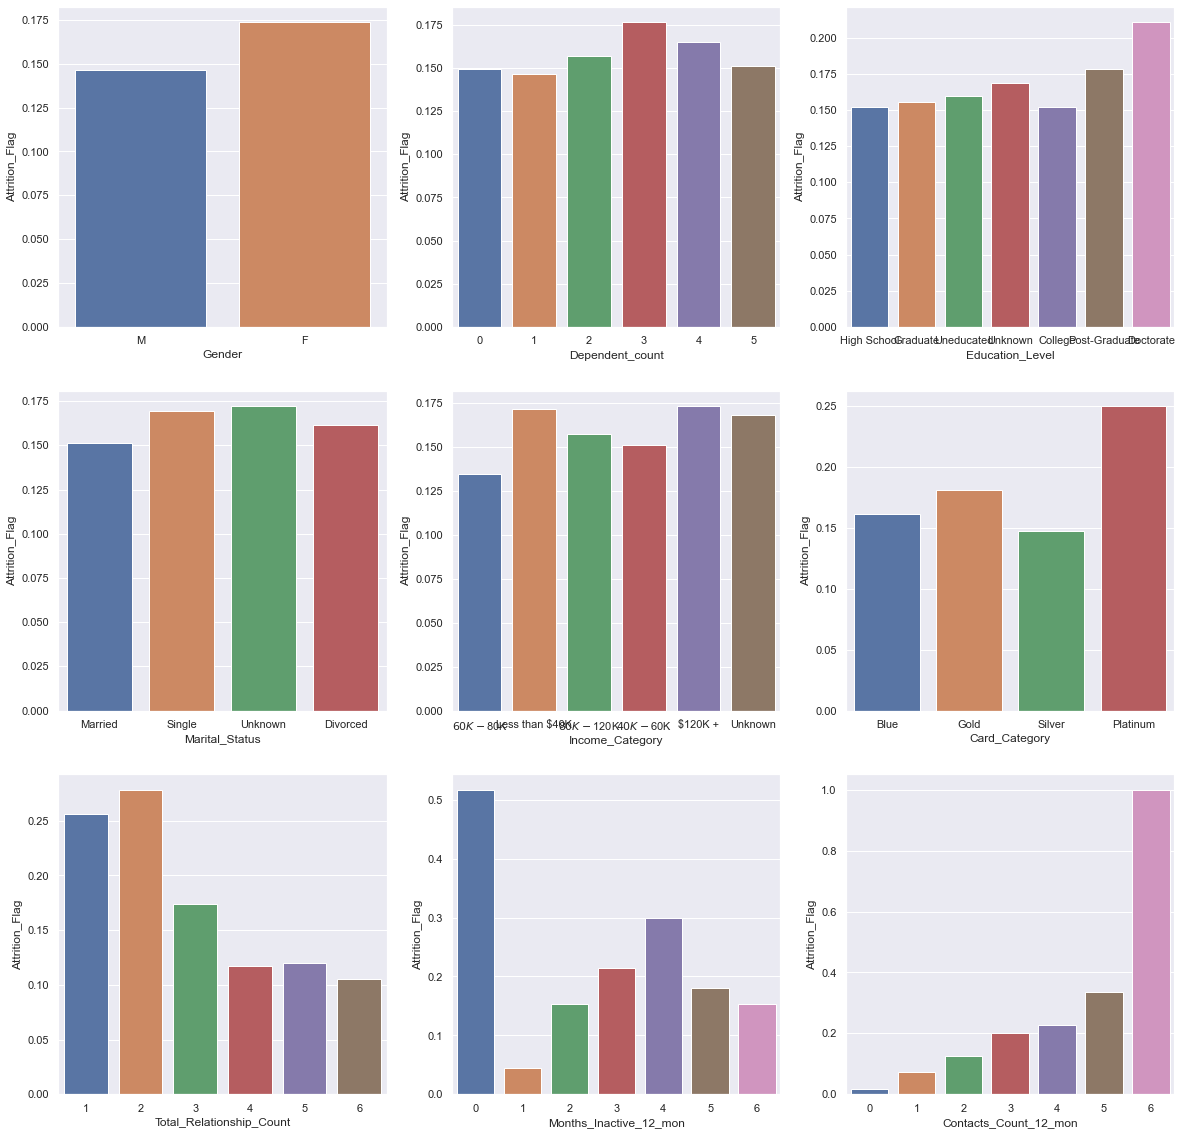

In [60]:
fig=plt.figure(figsize=(20,20))
for i,col in enumerate(chk1):
    ax=fig.add_subplot(3,3,i+1)
    sns.barplot(x=col,y='Attrition_Flag',data=df,ci=None)


##### Observations
<br>The graphs above average the numbers for the customers that have attrited (Left the Credit Card Services) across all atrributes and their subdivisions. <br>
Inferences on <b> ATTRITED CUSTOMERS </b><br>
- More Female than Male Customers. 
- Highest dependent count is 3 for for attrited customers.
- Customers with doctorates are the most attrited customers.
- Most attrited customers are either single or prefer not to give information on their marital status. 
- Most Attrited customers belong to the high income category with salary over 120K dollars. Although there are customers that do earn below 40k dollars that also leave the services. 
- Most attrited customers are the ones that had Platinum cards. 
- Most attrited customers had a low number of products / services with the bank (Total realtionship Count).
- Attrited customers were constantly active. They have the lowest inactivity.
- Attrited customers have the highest contact count. 


<u><b> ATTRITION FLAG v/s INCOME CATEGORY</b></u>

<Figure size 720x432 with 0 Axes>

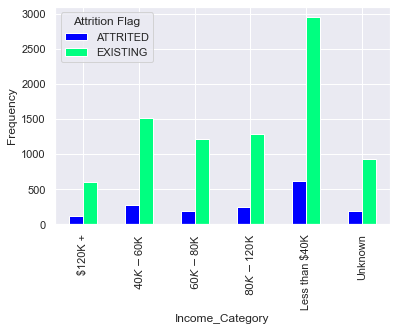

In [61]:
fig = plt.figure(figsize = (10,6))
tab2 = pd.crosstab(df['Income_Category'],DataSet['Attrition_Flag'])
tab2.plot.bar(cmap = "winter")
plt.ylabel("Frequency")
plt.legend(['ATTRITED', 'EXISTING'],loc = "upper left", title="Attrition Flag")

##### Observations
Attrited customers are far less compared to the existing ones across all Income Categories. But an increase in the individual numbers can prove to a point of contention for the bank.

<u><b> ATTRITION FLAG v/s CONTACT COUNT</b></u>

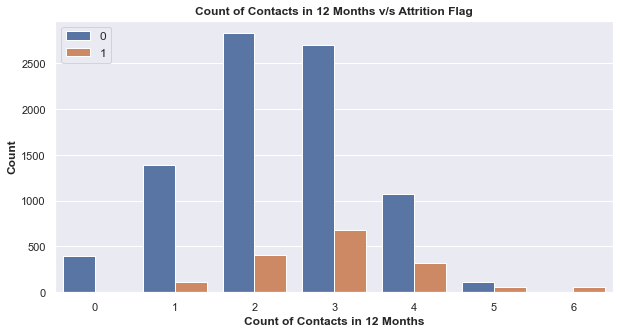

In [62]:
fig = plt.figure(figsize=[10,5]);
sns.countplot(data=df, x='Contacts_Count_12_mon', hue='Attrition_Flag');
plt.xlabel('Count of Contacts in 12 Months', fontweight='bold');
plt.ylabel('Count', fontweight='bold');
plt.legend(fontsize=12);
plt.title('Count of Contacts in 12 Months v/s Attrition Flag', fontweight='bold');

##### Observations
- Count of contacts increases in attrited customers.
- Only existing customers have 0 count of contacts. 

<u><b> ATTRITION FLAG v/s MARITAL STATUS v/s DEPENDENT COUNT</b></u>

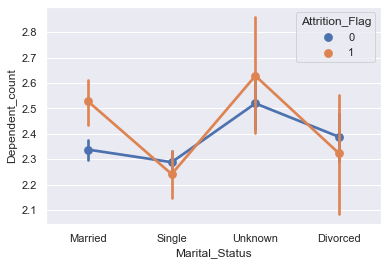

In [63]:
plot2 = sns.pointplot(df['Marital_Status'],df['Dependent_count'],hue = df['Attrition_Flag'])

##### Observations
- Existing customers have a higher dependent count in the case of Single and Divorced customers.
- Attrited customers have a higher dependent count in the case of Married and Unknown Customers. 

<u><b> ATTRITION FLAG v/s EDUCATION LEVEL v/s AVG UTILIZATION RATIO</b></u>

<AxesSubplot:xlabel='Education_Level', ylabel='Avg_Utilization_Ratio'>

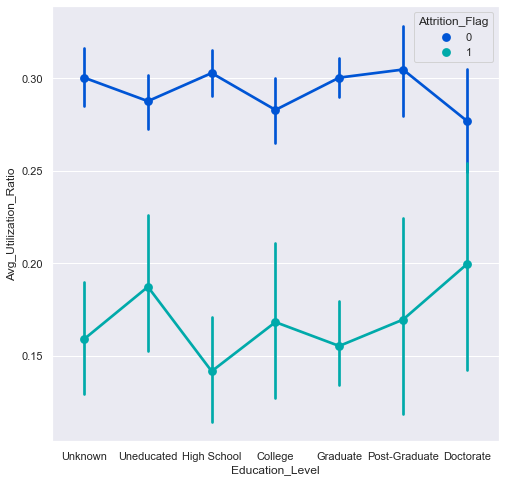

In [64]:
figure = plt.figure(figsize=(8,8))
order = ["Unknown","Uneducated","High School","College","Graduate","Post-Graduate","Doctorate"]
sns.pointplot(y=df['Avg_Utilization_Ratio'],x=df['Education_Level'],hue=df['Attrition_Flag'], palette = 'winter',order=order)

##### Observations
Exsiting cutsomers have a much higher utilization ratio as comapred to attrited customers across all education levels. 

<u><b> ATTRITION FLAG v/s CUSTOMER AGE </b></u>

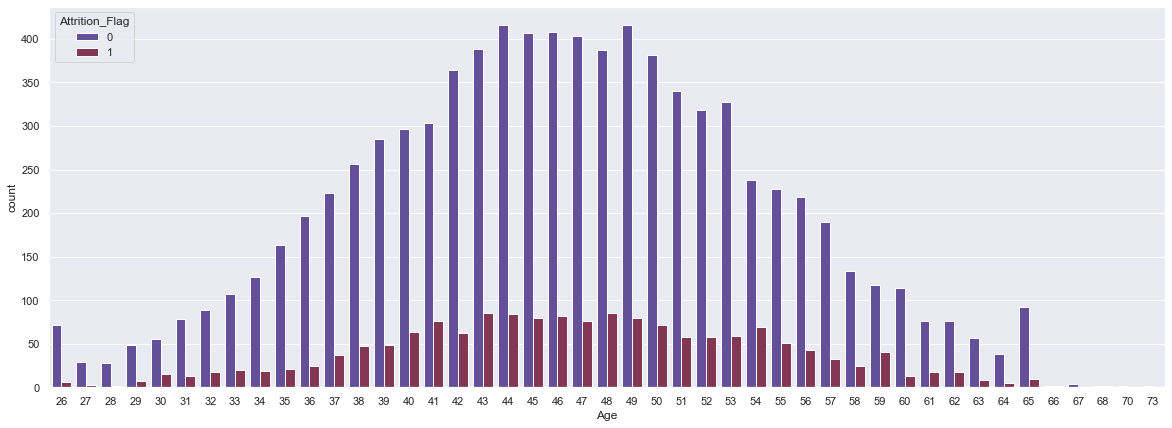

In [65]:
plt.figure(figsize=[20,7])
sns.countplot(x='Customer_Age', hue='Attrition_Flag', data=df, palette = "twilight");
plt.xlabel('Age');

##### Observations
- Chances of attrition increase as the age of the customer increases upto a certain point (47 years) after which it declines as the age increases (upto 73 years)

<u><b> MONTHS INACTIVE v/s INCOME CATEGORY </b></u>

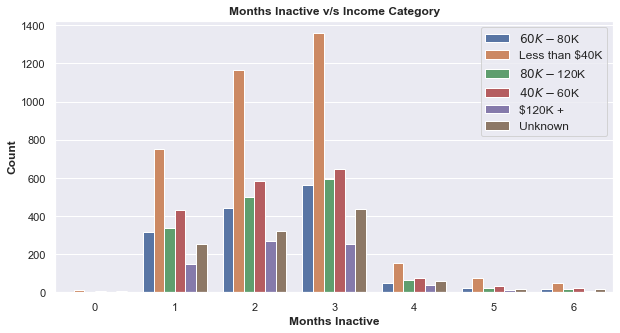

In [66]:
fig = plt.figure(figsize=[10,5]);
sns.countplot(data=df, x='Months_Inactive_12_mon', hue='Income_Category');
plt.xlabel('Months Inactive', fontweight='bold');
plt.ylabel('Count', fontweight='bold');
plt.legend(fontsize=12);
plt.title('Months Inactive v/s Income Category', fontweight='bold');

##### Observations
- For all the income categories the inactive months increase form 1 to 3 months, after which there is a sharp decline in inactivity.

<u><b> CARD CATEGORY v/s MONTHS ON BOOK (ATTRITED CUSTOMER = YES)</b></u>

In [67]:
df20 = df.copy
df20 = df[df['Attrition_Flag']==1] # DataSet of Attrited Customers

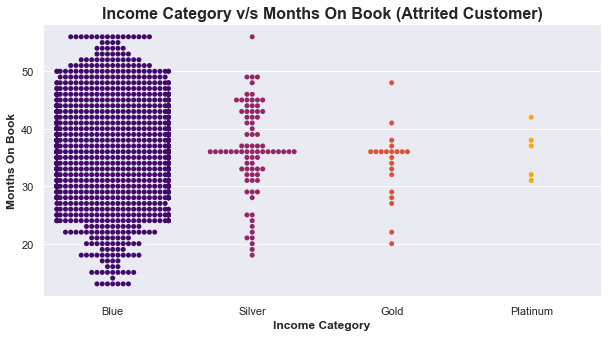

In [68]:
fig = plt.figure(figsize=[10,5]);
sns.swarmplot(data=df20, y='Months_on_book', x='Card_Category',palette = 'inferno');
plt.xlabel('Income Category',fontweight='bold');
plt.ylabel('Months On Book', fontweight='bold');
plt.title('Income Category v/s Months On Book (Attrited Customer)', fontsize=16, fontweight='bold');

##### Observations
- Blue and Silver Card category attrited customers show the highest value for months on book. 
- Blue category has the highest number of attrited customers.

<u><b> EDUCATION LEVEL v/s AVG OPEN TO BUY (ATTRITED CUSTOMER = YES)</b></u>

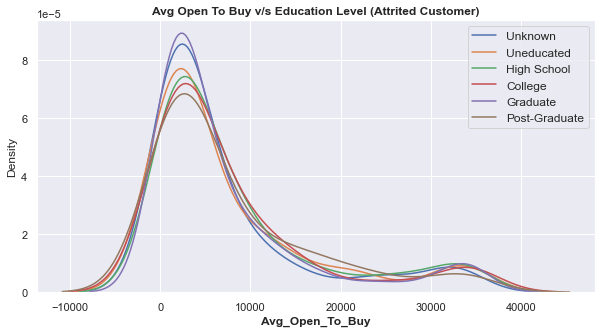

In [69]:
fig = plt.figure(figsize=[10,5]);
sns.distplot(df20.loc[df20['Education_Level'] == 'Unknown','Avg_Open_To_Buy'], kde=True, hist=False, label='Unknown');
sns.distplot(df20.loc[df20['Education_Level'] == 'Uneducated','Avg_Open_To_Buy'], kde=True, hist=False, label='Uneducated');
sns.distplot(df20.loc[df20['Education_Level'] == 'High School','Avg_Open_To_Buy'], kde=True, hist=False, label='High School');
sns.distplot(df20.loc[df20['Education_Level'] == 'College','Avg_Open_To_Buy'], kde=True, hist=False, label='College');
sns.distplot(df20.loc[df20['Education_Level'] == 'Graduate','Avg_Open_To_Buy'], kde=True, hist=False, label='Graduate');
sns.distplot(df20.loc[df20['Education_Level'] == 'Post-Graduate','Avg_Open_To_Buy'], kde=True, hist=False, label='Post-Graduate');
plt.xlabel('Avg_Open_To_Buy', fontweight='bold');
plt.legend(fontsize=12);
plt.title('Avg Open To Buy v/s Education Level (Attrited Customer)', fontweight='bold');

##### Observations
- In the 0 to 1000 range of Average Open To Buy, as education level increases, the avg. open to buy decreases. Except in the case of Graduat degrre holders which prove to be an anomaly and have a miuch higher density of avg. open to buy, thus deviating from the standard trend. 

### Key Observations based on EDA
- Customer Age seems to be largely evenly distributed.
- The Customer Age mean is seems to be around 46 - 47. Minimum Customer Age is 26 and Maximum Age is 70. There seems to be no discrepancy.
- Mean = Median = Mode
- Most of the customers have almost 35 - 40 months on book. 
- Most of the customers are in the 0 - 5000 Credit Limit.
- Most of the customers have a revolving balance of 0 - 250
- Number of customers decreases as the average open to buy amount increases.
- The value is the ratio of Transaction Amt in Q4 to Q1. Since the Mean is less than 1, we can say that people transactless in Q4 than in Q1
- The value is the ratio of Transaction Counts in Q4 to Q1. Since the Mean is less than 1, we can say that people transact less in Q4 than in Q1
- Most Customers have transaction amounts ranging from 0 - 5000.
- On an average there are 60 - 65 transactions a year for a customer.
- A very large chunk of the population has an avg utilization ratio in the range of 0 - 0.1; showing that a large chunk of the population does not spend the available credit.
- Almost 84% of the dataset is existing customers.
- Only 16% are Attrited Customer (i.e.: Customers have left.)
- The Attriton Flag Distribution is highly imbalanced (Skewed)
- Gender seem to be a balanced column, with 53% Female and 47% Male Customers. 
- Over 5000 customers have 2 - 3 dependents making up a large chunk of the dataset.
- Very few customers (less than 500) have 5 dependents.
- Almost 50% of the dataset constitutes of Graduates and High School Diploma Customers of which Graduates account for the largest chunk.
- Less than 10% of the dataset makes up of customers with Doctorates and Post-Graduated Degrees.
- 15% of the customers have not provided any information on their education level. 
- Most of the users are either Married (4500+) or Single (~4000).
- Very few customers are divorced.
- Few Customers have not provided info on their Marital Status. 
- Almost 50% of the DataSet earns less than 60K Dollars.
- Very small percentage of the dataset earns more than 120K Dollars.
- Few Customers have not provided info on their Income. 
- Most of the users belong to the Blue Category. 
- Negligible number of customers have the Platinum Category of Credit Cards. 
- Very few customers have Silver or Gold Category of Credit Cards. 
- 3 is the highest relationship count for the customers in the dataset. 
- Mostly seems to be evenly distributed. 
- Months Inactive ranges from 0 - 6 months. 
- Most customers have 3 month of inactivity followed by 2 and then 1.
- Contacts Count ranges from 0 - 6. 
- Most customers have 3 contacts followed by 2 and then 1.
- Heat Map shows the correlation between the individual attributes. There is distributed correlation between the attributes of this dataset. With this we can draw the following inferences : <br>
<b> HIGH CORRELATION : </b> Months_on_book and Customer_Age, Avg_Open_To_Buy and Credit_Limit.<br>
<b> MEDIUM CORRELATION : </b> Avg_Utilization_Ratio and Total_Revolving_Bal<br>
<b> LOW CORRELATION : </b> All Other Attributes<br>
- In the general sense, the credit limit is higher for existing cutsomers than for attrited customers except in the case of customers with high school degrees only where the opposite happens. 
- The credit limit does not have a huge difference between the existing cutsomers and attrited customers for varying levels of education, except for customers with a doctorate; where the difference is high. 
- Total Revolving Balance in the 0 - 500 range has a higher number of Attrited Customers than Existing Customers. 
- This changes as the Total Revoloving Balance increases with the number of Existing Customers taking over the Attrited ones. Therefore Existing Customers have a mugh higher Total Revolving Balance than attrited ones.
- As the Total Revolving Balance further increases to 2500, the number of Existing customers and Attrited customers in this range equalizes. 
- Customers of different Marital Statuses arranged in Descending order with respect to their Dependent counts : <br>
<b>0 Dependents : </b>Single > Married > Divorced > Unknown<br>
<b>1 Dependents : </b>Single > Married > Unknown > Divorced<br>
<b>2 Dependents : </b>Married > Single > Divorced > Unknown<br>
<b>3 Dependents : </b>Married > Single > Unknown > Divorced<br>
<b>4 Dependents : </b>Married > Single > Unknown > Divorced<br>
<b>5 Dependents : </b>Married > Single = Unknown > Divorced<br>
<b>GENERAL : </b>Married Customers ahve the most dependents and Divorced Customers have the least. <br>
- The existing and attrited customer values for both genders is more or less the same with Females leading both categories only by a very small margin. <br>
- <u>Inferences on <b> ATTRITED CUSTOMERS </b></u><br>
<i>More Female than Male Customers. <br>
Highest dependent count is 3 for for attrited customers.<br>
Customers with doctorates are the most attrited customers.<br>
Most attrited customers are either single or prefer not to give information on their marital status. <br>
Most Attrited customers belong to the high income category with salary over 120K dollars. Although there are customers that do earn below 40k dollars that also leave the services. <br>
Most attrited customers are the ones that had Platinum cards. <br>
Most attrited customers had a low number of products / services with the bank (Total realtionship Count).<br>
Attrited customers were constantly active. They have the lowest inactivity.<br>
Attrited customers have the highest contact count. </i><br>
- Attrited customers are far less compared to the existing ones across all Income Categories. But an increase in the individual numbers can prove to a point of contention for the bank.
- Count of contacts increases in attrited customers.
- Only existing customers have 0 count of contacts.
- Existing customers have a higher dependent count in the case of Single and Divorced customers.
- Attrited customers have a higher dependent count in the case of Married and Unknown Customers.
- Exsiting cutsomers have a much higher utilization ratio as comapred to attrited customers across all education levels. 
- Chances of attrition increase as the age of the customer increases upto a certain point (47 years) after which it declines as the age increases (upto 73 years)
- For all the income categories the inactive months increase form 1 to 3 months, after which there is a sharp decline in inactivity.
- Blue and Silver Card category attrited customers show the highest value for months on book.
- Blue category has the highest number of attrited customers.
- In the 0 to 1000 range of Average Open To Buy, as education level increases, the avg. open to buy decreases. Except in the case of Graduat degrre holders which prove to be an anomaly and have a miuch higher density of avg. open to buy, thus deviating from the standard trend.

### Key Insights based on EDA
- Months on Book only ranges from 10 - 60 months. This data would not be enoguh in predication of customers with accounts less than a year or greater than 5 years. 
- Imbalanced credit limit many discourage customers from continuing with the banks services. 
- Low revolving balance shows that customers may churn whihch is why they have low balances saved with the bank. 
- Ratio of Transaction Amt and transcation count in Q4 to Q1 has a Mean less than 1. Therefore, we can say that people transact less in Q4 than in Q1
- Very small transaction amounts accounts for people not very big on spending therefore not utilizing their credit card much. 
- The higher the number of transactions a customer has the less likely they are to leave. 
- Equal distribution among male and female credit card holders showing no discrepancy in the methods of providing credit cards to different genders by the bank. 
- Few customers have not provided any information on their Marital Status, Education Level or Income Category. This points to the fact that they may leave or attrite and thats why theydid not provide any info
- Most customers hold a card from the blue category. This shows that the bank dislikes risk and does not provide a better category of card unless the customer has a higher income. Higher card categories are based on your salary income. This also points to the fact that most people on the dataset have less income.  There could also be charges on the higher cards which is why people don't prefer it. This may vary from bank to bank. 
- Increase in inactivity or number of contacts may lead to attribution / churning. Point to problems in the bank or customer dissatisfaction.
- Difference in credit limit between customers may contribute to churning.
- Churning increases as Total revolving balance decreases.
- Customers with doctorates and higher income are the most attrited customers. Specific targeted marketing to them may help.
- Attrited customers were constantly active with high contact counts. Showing that they had some previaling issues with the bank because of which they had to constantly contact the bank and stay active in the working of their accounts. 
- Married customers with higher dependent counts are likey to churn.
- Blue and Silver Card category attrited customers show the highest value for months on book. 

## Data Pre-Processing II
### FEATURE ENGINEERING
<b> This part of Data Preprocessing is done to cater to the Model Building part of the project. It will help in easier development of the Logistic Regression Model and Decision Tree <br></b>
<u>CONTINUATION</u>

#### STEP 3 : FIXING MISSING VALUES
Missing Values across the Numeric Columns are replaced with the median or mode of the column <br>
There are no missing values in this dataset although there are UNKNOWN values. However, these values will not be replaced as the customer had intended to not give out any information and thus it is in important parametric in analysing the churning. <br>
Hence, No Missing Values have to be fixed. 

#### STEP 4 : FIXING DATA TYPE
Conversion of Object Type Column to Category Type.  

In [70]:
df['Gender'] = df['Gender'].astype('category')
df['Education_Level'] = df['Education_Level'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Income_Category'] = df['Income_Category'].astype('category')
df['Card_Category'] = df['Card_Category'].astype('category')

Attrition_Flag is the dependent variable - type integer.<br>
Attrition_Flag is a class variable and should be converted to a categorical variable for further analysis.

In [71]:
df["Attrition_Flag"] = df["Attrition_Flag"].astype("category")

In [72]:
df.dtypes

Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

#### STEP 5 : OUTLIERS AND THEIR TREATMENT
Identifying the outliers in all columns and treating them <br>

In [73]:
NUM = ['Customer_Age','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']



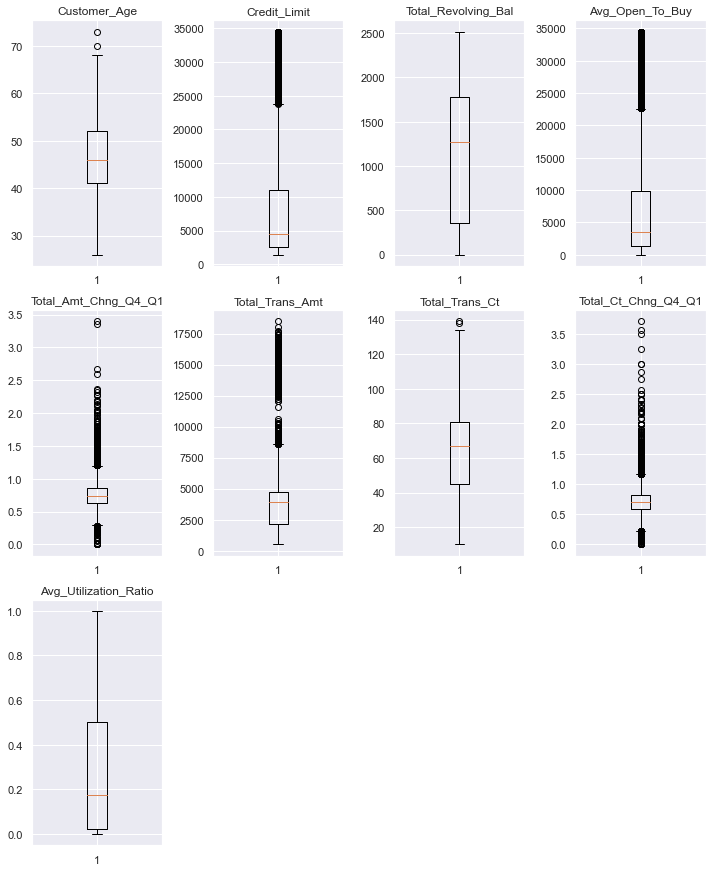

In [74]:
plt.figure(figsize=(10,20))

for i, variable in enumerate(NUM):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In this case, we will not be treating the outliers as they may prove to be important during the building of the boosting and bagging models.

#### STEP 6 : ENCODING VARIABLES
Done while Model Building <br>

## Model Building - Bagging
#### STEP 1 : DEFINE X AND Y VARIABLES

In [75]:
y = df[['Attrition_Flag']] #Dependent Variable
X = df.drop(['Attrition_Flag'], axis=1) #Independent Variables

#### STEP 2 : CREATING DUMMY VARIABLES
The Categorical Columns in this dataset cannot be read by the equation pertaining to model building. <br>
So we create simple true or false columns with their titular equivalent and column value. These will be used as independent variables without imposing any kind of ordering between the values of that particular column. 

In this case; the Categorical Columns are : <br><i>1) Gender <br>2) Education_Level <br>3) Marital_Status <br>4) Income_Category<br> 5) Card_Category<br></i>

In [76]:
X = pd.get_dummies(X, columns=['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=False)
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0


In [77]:
X.dtypes

Customer_Age                        int64
Dependent_count                     int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Gender_F                            uint8
Gender_M                            uint8
Education_Level_College             uint8
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated          uint8
Education_Level_Unknown             uint8
Marital_Status_Divorced           

In [78]:
X.shape

(10127, 37)

The Data Frame X containing the independent variables now has 37 columns as opposed to the initial of 20 columns.

#### STEP 3 : SPLITTING THE DATA INTO TRAINING AND TESTING SET
- 70% Training Data Set
- 30% Testing Data Set

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<u>TRAINING DATASET</u>

In [80]:
X_train.shape

(7088, 37)

In [81]:
y_train.shape

(7088, 1)

<u>TESTING DATASET</u>

In [82]:
X_test.shape

(3039, 37)

In [83]:
y_test.shape

(3039, 1)

FUNCTIONS FOR ACCESSING SCORES AND CONFUSION MATRIX

In [84]:
def get_metrics_score(model,flag=True):

    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [85]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):

    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 1) Bagging Classifier

Accuracy on training set :  0.9964729119638827
Accuracy on test set :  0.9552484369858506
Recall on training set :  0.9815627743634767
Recall on test set :  0.7991803278688525
Precision on training set :  0.9964349376114082
Precision on test set :  0.9112149532710281
F1-Score on training set :  0.9889429455992923
F1-Score on test set :  0.851528384279476


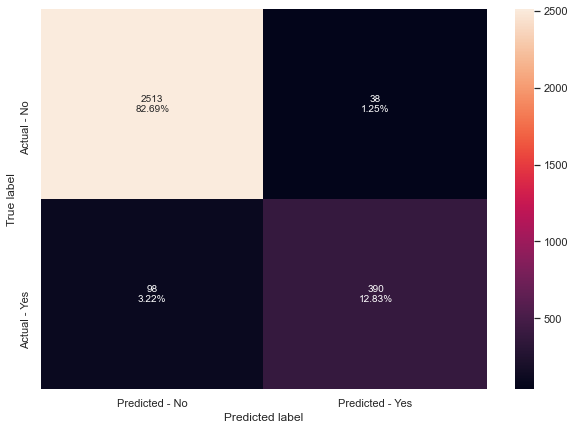

In [86]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

### 2) Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.9483382691674893
Recall on training set :  1.0
Recall on test set :  0.7479508196721312
Precision on training set :  1.0
Precision on test set :  0.9147869674185464
F1-Score on training set :  1.0
F1-Score on test set :  0.8229988726042842


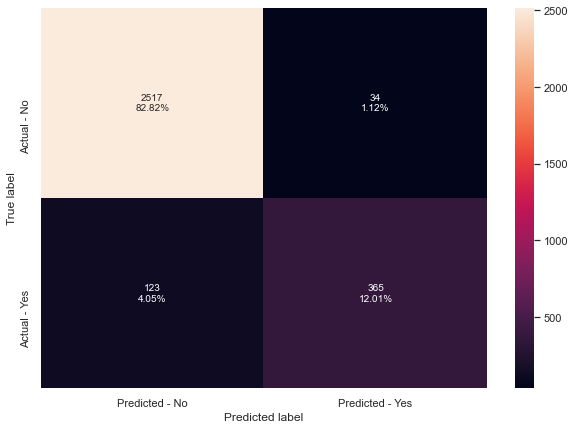

In [87]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

### 3) Decision Tree

Accuracy on training set :  1.0
Accuracy on test set :  0.9345179335307667
Recall on training set :  1.0
Recall on test set :  0.7766393442622951
Precision on training set :  1.0
Precision on test set :  0.8081023454157783
F1-Score on training set :  1.0
F1-Score on test set :  0.7920585161964473


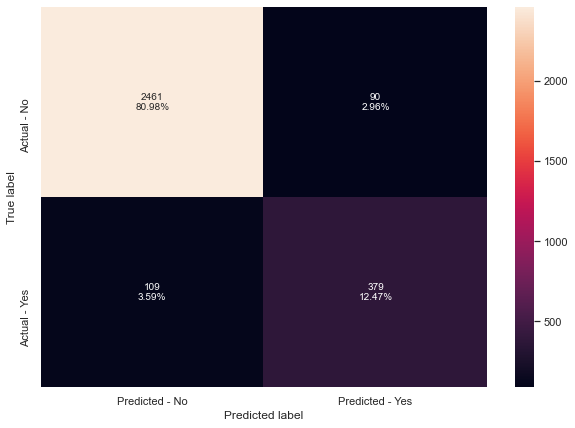

In [88]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

## Model Building - Boosting


### 1) Adaboost Model

Accuracy on training set :  0.9654345372460497
Accuracy on test set :  0.9542612701546561
Recall on training set :  0.8700614574187884
Recall on test set :  0.8217213114754098
Precision on training set :  0.9108455882352942
Precision on test set :  0.8852097130242825
F1-Score on training set :  0.8899865289627301
F1-Score on test set :  0.8522848034006375


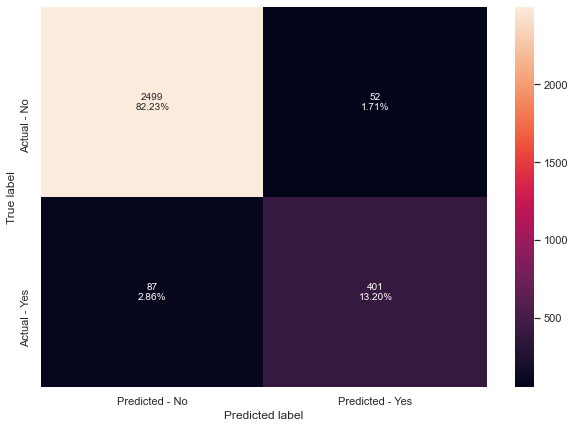

In [89]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

### 2) Gradient boost

Accuracy on training set :  0.9771444695259593
Accuracy on test set :  0.9638038828562027
Recall on training set :  0.8928884986830553
Recall on test set :  0.8299180327868853
Precision on training set :  0.9621570482497634
Precision on test set :  0.9375
F1-Score on training set :  0.9262295081967213
F1-Score on test set :  0.8804347826086956


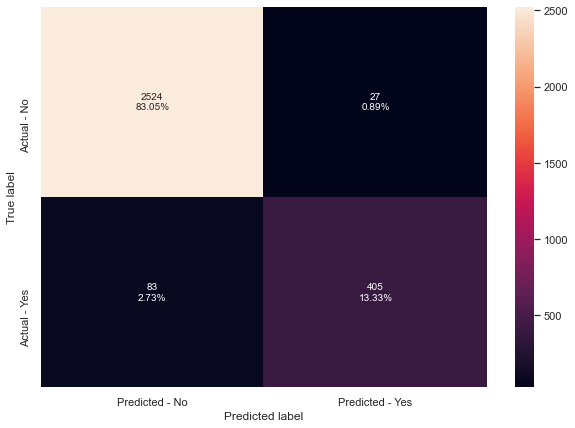

In [90]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

### 3) XGboost 

Accuracy on training set :  1.0
Accuracy on test set :  0.9677525501809806
Recall on training set :  1.0
Recall on test set :  0.8586065573770492
Precision on training set :  1.0
Precision on test set :  0.9352678571428571
F1-Score on training set :  1.0
F1-Score on test set :  0.8952991452991453


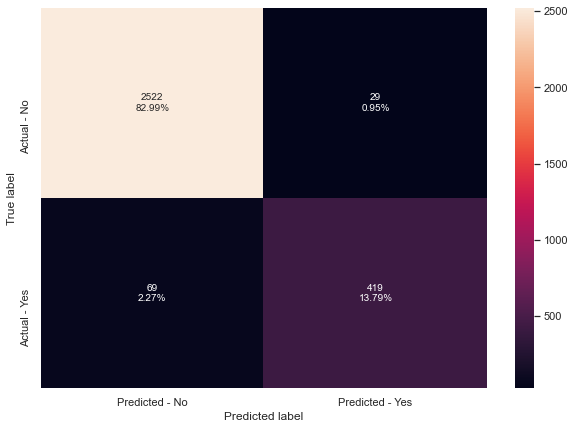

In [91]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

## Model Building - Logistic Regression


Accuracy on training set :  0.8981376975169301
Accuracy on test set :  0.8943731490621916
Recall on training set :  0.5302897278314311
Recall on test set :  0.5122950819672131
Precision on training set :  0.7635903919089759
Precision on test set :  0.7507507507507507
F1-Score on training set :  0.6259067357512953
F1-Score on test set :  0.6090133982947624


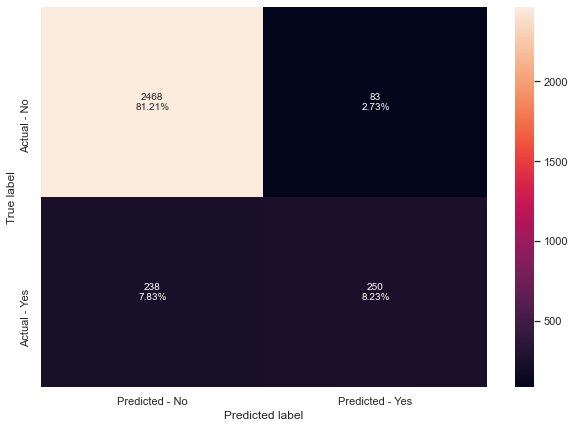

In [92]:
lr = LogisticRegression(random_state=1, solver="liblinear")
lr.fit(X_train,y_train)

get_metrics_score(lr)

make_confusion_matrix(lr,y_test)

### Evaluating Model Performance using KFold and cross_val_score

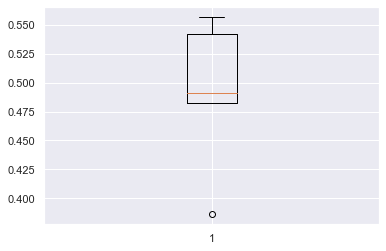

In [93]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

The metric we take into consideration here is RECALL <br>
Performance on training set varies between 0.48 to 0.54 recall and has a value of 0.51 on test set. <br>
Logistic Regression has given a generalized performance on training and test set.<br>
We will now use Up Sampling and Down Sampling to improve Model Performance. <br>


### Oversampling (Up Sampling) using SMOTE
Up Sampling involves getting more data points for the minority class.

In [94]:
from imblearn.over_sampling import SMOTE

In [149]:
BegEx = (y_train==0).sum()
BegAt = (y_train==1).sum()
print("Before UpSampling, counts of label '1 - Attrited Customer ': {}".format(BegAt))
print("Before UpSampling, counts of label '0 - Existing Customer ': {} \n".format(BegEx))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

AftOvEx = (y_train_over==0).sum()
AftOvAt = (y_train_over==1).sum()
print("After UpSampling, counts of label '1 - Attrited Customer ': {}".format(AftOvAt))
print("After UpSampling, counts of label '0 - Existing Customer ': {} \n".format(AftOvEx))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label '1 - Attrited Customer ': Attrition_Flag    1139
dtype: int64
Before UpSampling, counts of label '0 - Existing Customer ': Attrition_Flag    5949
dtype: int64 

After UpSampling, counts of label '1 - Attrited Customer ': Attrition_Flag    5949
dtype: int64
After UpSampling, counts of label '0 - Existing Customer ': Attrition_Flag    5949
dtype: int64 

After UpSampling, the shape of train_X: (11898, 37)
After UpSampling, the shape of train_y: (11898, 1) 



<b><u>LOGISTIC REGRESSION ON OVERSAMPLED DATA</u></b>

In [150]:
log_reg_over = LogisticRegression(random_state = 1,solver="liblinear")

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1, solver='liblinear')

Accuracy on training set :  0.8985609480812641
Accuracy on test set :  0.8927278710102007
Recall on training set :  0.6066725197541704
Recall on test set :  0.5799180327868853
Precision on training set :  0.7182952182952183
Precision on test set :  0.7004950495049505
F1-Score on training set :  0.6577820085673488
F1-Score on test set :  0.6345291479820627


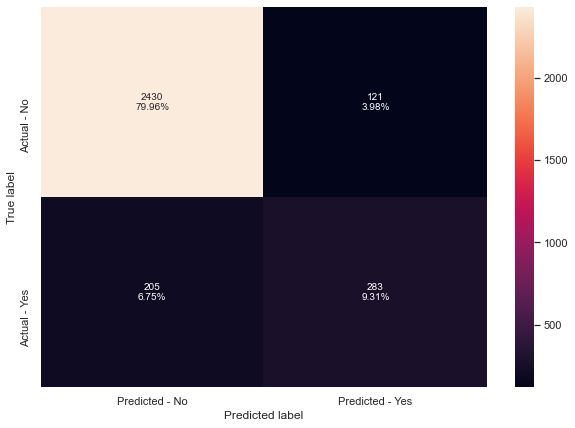

In [151]:
#Calculating different metrics
get_metrics_score(log_reg_over)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

While there <u>hasn't been an increase</u> in the <b>Accuracy or the F1 Score</b>; the <b>Recall and Precision</b> have <u> gone up</u> for both the training and the test set. <br>
The Model is OVERFITTING.<br>
We can also use other techniques like REGULARIZATION and DOWNSAMPLING to see if it leads to any improvement in the performance metrics. <br> 

### Regularization
Regularization to see if overfitting can be reduced from the previous case. 

In [152]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.79627539503386
Accuracy on test set :  0.7890753537347812
Recall on training set :  0.5618964003511853
Recall on test set :  0.5307377049180327
Precision on training set :  0.4037854889589905
Precision on test set :  0.3859910581222057
F1-Score on training set :  0.4698972099853157
F1-Score on test set :  0.4469370146678171


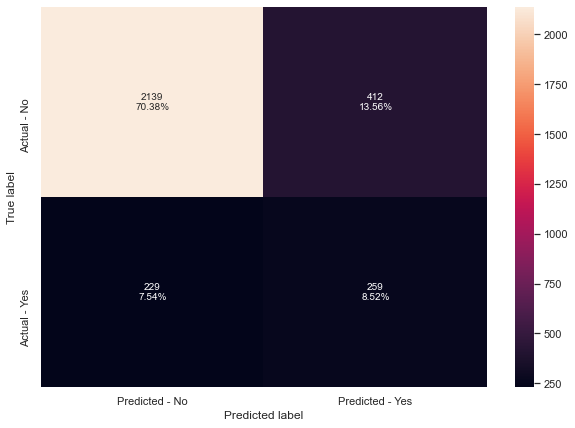

In [153]:
#Calculating different metrics
get_metrics_score(lr_estimator)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

Model performance hasn't improved much after regularization.

### Undersampling (Down Sampling) using SMOTE
Helps in dealing with the class imbalance.

In [154]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [155]:
BegEx = (y_train==0).sum()
BegAt = (y_train==1).sum()
print("Before Under Sampling, counts of label '1 - Attrited Customer ': {}".format(BegAt))
print("Before Under Sampling, counts of label '0 - Existing Customer ': {} \n".format(BegEx))

AftUnEx = (y_train_un==0).sum()
AftUnAt = (y_train_un==1).sum()      
print("After Under Sampling, counts of label '1 - Attrited Customer ': {}".format(AftUnAt))
print("After Under Sampling, counts of label '0 - Existing Customer ': {} \n".format(AftUnEx))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label '1 - Attrited Customer ': Attrition_Flag    1139
dtype: int64
Before Under Sampling, counts of label '0 - Existing Customer ': Attrition_Flag    5949
dtype: int64 

After Under Sampling, counts of label '1 - Attrited Customer ': Attrition_Flag    1139
dtype: int64
After Under Sampling, counts of label '0 - Existing Customer ': Attrition_Flag    1139
dtype: int64 

After Under Sampling, the shape of train_X: (2278, 37)
After Under Sampling, the shape of train_y: (2278, 1) 



<b><u>LOGISTIC REGRESSION ON UNDERSAMPLED DATA</u></b>

In [157]:
log_reg_under = LogisticRegression(random_state = 1, solver="liblinear")
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1, solver='liblinear')

Accuracy on training set :  0.8514390519187359
Accuracy on test set :  0.8525830865416255
Recall on training set :  0.8507462686567164
Recall on test set :  0.8340163934426229
Precision on training set :  0.5232181425485961
Precision on test set :  0.5258397932816538
F1-Score on training set :  0.6479438314944834
F1-Score on test set :  0.6450079239302694


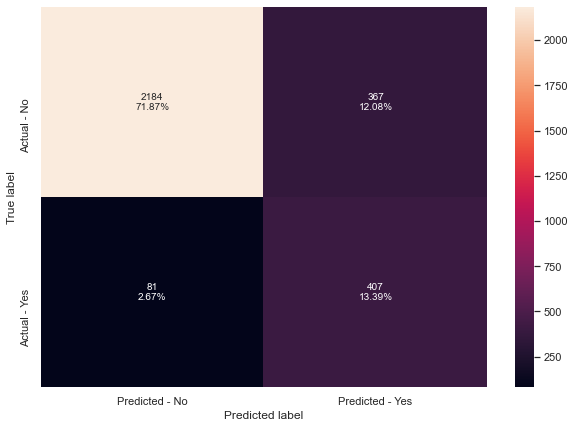

In [158]:
#Calculating different metrics
get_metrics_score(log_reg_under)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

On Downsampling, RECALL has risen significantly which is the performance metric at interest. Thus improving Logistic Regression.

### Comparing the Logistic Regression Models

In [184]:
# defining list of model
models = [lr,log_reg_over, lr_estimator,log_reg_under]

# defining empty lists to add train and test results
train_acc = []
test_acc = []
train_recall = []
test_recall = []
train_precision = []
test_precision = []
train_f1 = []
test_f1 = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    train_acc.append(j[0])
    test_acc.append(j[1])
    train_recall.append(j[2])
    test_recall.append(j[3])
    train_precision.append(j[4])
    test_precision.append(j[5])
    train_f1.append(j[6])
    test_f1.append(j[7])

In [186]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': train_acc,'Test_Accuracy': test_acc,
                                          'Train_Recall':train_recall,'Test_Recall':test_recall,
                                          'Train_Precision':train_precision,'Test_Precision':test_precision,
                                          'Train_F1':train_f1,'Test_F1':test_f1}) 

#Sorting models in decreasing order of test recall
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Logistic Regression,0.898138,0.894373,0.530290,0.512295,0.763590,0.750751,0.625907,0.609013
1,Logistic Regression on Oversampled data,0.898561,0.892728,0.606673,0.579918,0.718295,0.700495,0.657782,0.634529
2,Logistic Regression-Regularized (Oversampled),0.796275,0.789075,0.561896,0.530738,0.403785,0.385991,0.469897,0.446937
3,Logistic Regression on Undersampled data,0.851439,0.852583,0.850746,0.834016,0.523218,0.525840,0.647944,0.645008


From the table above, we can say that the best Regression Model would be the Logistic Regression on the Undersampled Data with the highest RECALL score.

## MODEL PERFORMANCE EVALUATION
## Comparison of Logistic Regression, Bagging and Boosting Models


In [192]:
# defining list of model
models = [bagging_classifier,rf_estimator,d_tree,ab_classifier,gb_classifier,xgb_classifier,lr,log_reg_over, lr_estimator,log_reg_under]

# defining empty lists to add train and test results
ftrain_acc = []
ftest_acc = []
ftrain_recall = []
ftest_recall = []
ftrain_precision = []
ftest_precision = []
ftrain_f1 = []
ftest_f1 = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    ftrain_acc.append(j[0])
    ftest_acc.append(j[1])
    ftrain_recall.append(j[2])
    ftest_recall.append(j[3])
    ftrain_precision.append(j[4])
    ftest_precision.append(j[5])
    ftrain_f1.append(j[6])
    ftest_f1.append(j[7])

In [193]:
comparison_frame2 = pd.DataFrame({'Model':['Bagging Classifier','Random Forest','Decision Tree','AdaBoost Model','Gradient Boost','XGBoost','Logistic Regression','Logistic Regression on Oversampled data','Logistic Regression-Regularized (Oversampled)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': ftrain_acc,'Test_Accuracy': ftest_acc,
                                          'Train_Recall':ftrain_recall,'Test_Recall':ftest_recall,
                                          'Train_Precision':ftrain_precision,'Test_Precision':ftest_precision,
                                          'Train_F1':ftrain_f1,'Test_F1':ftest_f1}) 

#Sorting models in decreasing order of test recall
comparison_frame2




,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Bagging Classifier,0.996473,0.955248,0.981563,0.799180,0.996435,0.911215,0.988943,0.851528
1,Random Forest,1.000000,0.948338,1.000000,0.747951,1.000000,0.914787,1.000000,0.822999
2,Decision Tree,1.000000,0.934518,1.000000,0.776639,1.000000,0.808102,1.000000,0.792059
3,AdaBoost Model,0.965435,0.954261,0.870061,0.821721,0.910846,0.885210,0.889987,0.852285
4,Gradient Boost,0.977144,0.963804,0.892888,0.829918,0.962157,0.937500,0.926230,0.880435
5,XGBoost,1.000000,0.967753,1.000000,0.858607,1.000000,0.935268,1.000000,0.895299
6,Logistic Regression,0.898138,0.894373,0.530290,0.512295,0.763590,0.750751,0.625907,0.609013
7,Logistic Regression on Oversampled data,0.898561,0.892728,0.606673,0.579918,0.718295,0.700495,0.657782,0.634529
8,Logistic Regression-Regularized (Oversampled),0.796275,0.789075,0.561896,0.530738,0.403785,0.385991,0.469897,0.446937
9,Logistic Regression on Undersampled data,0.851439,0.852583,0.850746,0.834016,0.523218,0.525840,0.647944,0.645008


### Which metric is right for model performance evaluation?

In this particular case; we would prefer <b> RECALL </b> to be MAXIMIZED as this prevents the chances of FALSE NEGATIVES. <br>
This is because if the model predicts that a customer will churn (leave the services of the bank) but then they actually DO NOT, then the bank has to account for the people staying at the bank. They will also unnecessarily deploy extra resources to ensure customers stay when they do not need to. These resources are then misused and will not be put into good use causing a loss. 

Therefore checking the MAXIMUM RECALL across the various models; we arrive at these 4 as the TOP ONES : <br>
<b>1) XGBoost<br>
2) Logistic Regression on Undersampled Data<br>
3) Gradient Boost Model<br>
4) Adaboost Model</b><br>



Stratified K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.<br>
Using the recall values from <u>Stratified K-Folds cross-validation</u>, we will pick the <u>TOP 3 MODELS for HYPERPARAMETER TUNING</u>

Bagging Classifier: 81.82664811809259
Random Forest: 76.82278383182627
Decision Tree: 77.70500038642864
AdaBoost Model: 83.9315248473607
Gradient Boost: 84.10812272973182
XGBoost: 88.76265553752222
Logistic Regression on Undersampled data: 49.17033773861967


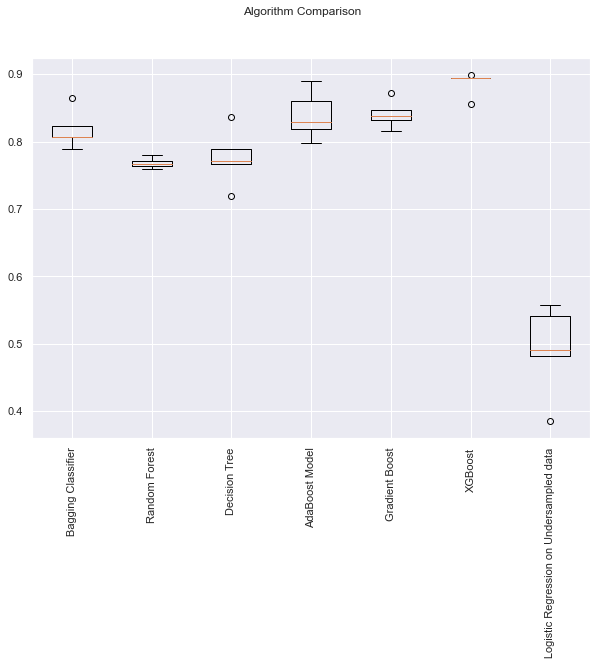

In [208]:
models2 = [bagging_classifier,rf_estimator,d_tree,ab_classifier,gb_classifier,xgb_classifier,log_reg_under]

results = []
names = ['Bagging Classifier','Random Forest','Decision Tree','AdaBoost Model','Gradient Boost','XGBoost','Logistic Regression on Undersampled data']
i = 0
for model in models2:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)  
    print("{}: {}".format(names[i], cv_result.mean() * 100))
    i = i+1
    
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)

plt.show()

But due to time constraints and the time taken by the hypertuned version of XGBoost to run, we will be skipping that particular model and will be tuning the next 3 top models according to their Stratified K-Folds cross-validation recall scores. <br>
Namely:<b>
1) Gradient Boost Model<br>
2) Adaboost Model<br>
3) Bagging Classifier Model<br>
</b><br>

## Hyperparameter tuning using GRID SEARCH


### 1) Gradient Boost Model

In [246]:
%%time 

pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)


parameters = {
    "gradientboostingclassifier__n_estimators": np.arange(50,200,25),
    "gradientboostingclassifier__learning_rate": [0.1, 0.2, 0.05, 1],
    "gradientboostingclassifier__max_features":[0.8,0.9,1]
}


scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(estimator = pipe, param_grid = parameters, scoring=scorer,cv=5)
grid_cv = grid_obj.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))


Best parameters are {'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__max_features': 0.7, 'gradientboostingclassifier__n_estimators': 150} with CV score=0.8849756549965221:
Wall time: 17min 41s


In [247]:
# Creating new pipeline with best parameters
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        n_estimators=150,
        max_features = 0.7,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_features=0.7,
                                            n_estimators=150,
                                            random_state=1))])

Accuracy on training set :  0.9918171557562077
Accuracy on test set :  0.9703849950641659
Recall on training set :  0.9648814749780509
Recall on test set :  0.8688524590163934
Precision on training set :  0.9838854073410922
Precision on test set :  0.9422222222222222
F1-Score on training set :  0.9742907801418439
F1-Score on test set :  0.904051172707889


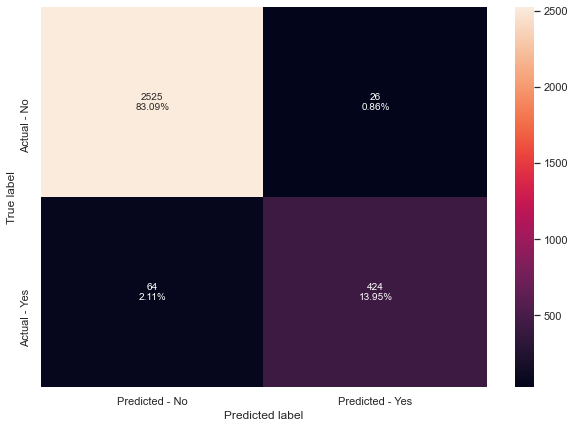

In [248]:
#Calculating different metrics
get_metrics_score(gbc_tuned1)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned1,y_test)

### 2) Adaboost Model

In [222]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 80} 
Score: 0.8788391684055954
Wall time: 2min 36s


In [223]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=80,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=80,
                                    random_state=1))])

Accuracy on training set :  1.0
Accuracy on test set :  0.9598552155314248
Recall on training set :  1.0
Recall on test set :  0.8422131147540983
Precision on training set :  1.0
Precision on test set :  0.9013157894736842
F1-Score on training set :  1.0
F1-Score on test set :  0.8707627118644068


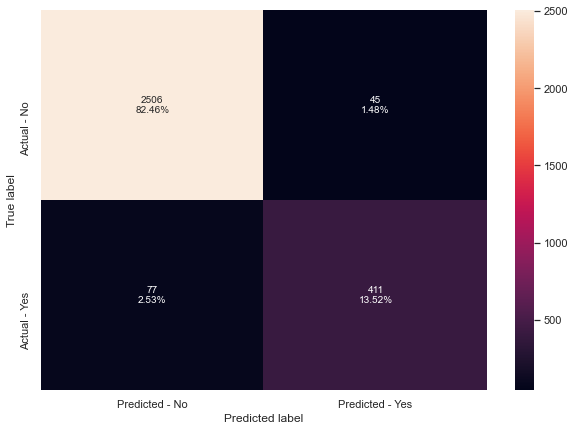

In [224]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

### 3) Bagging Classifier Model

In [259]:
%%time 

# Choose the type of classifier. 
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Grid of parameters to choose from
parameters = {'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=scorer, cv=5)
grid_cv.fit(X_train, y_train)


print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'baggingclassifier__max_features': 0.9, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__n_estimators': 50} 
Score: 0.8463366566195223
Wall time: 2min 33s


In [262]:
# Creating new pipeline with best parameters
bc_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        max_samples=0.9,
        max_features=0.9,
        n_estimators=50,
        random_state=1,
    ),
)

# Fit the model on training data
bc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                         random_state=1),
                                   max_features=0.9, max_samples=0.9,
                                   n_estimators=50, random_state=1))])

Accuracy on training set :  0.9184537246049661
Accuracy on test set :  0.9157617637380717
Recall on training set :  0.7181738366988587
Recall on test set :  0.7090163934426229
Precision on training set :  0.7609302325581395
Precision on test set :  0.7521739130434782
F1-Score on training set :  0.7389340560072267
F1-Score on test set :  0.7299578059071731


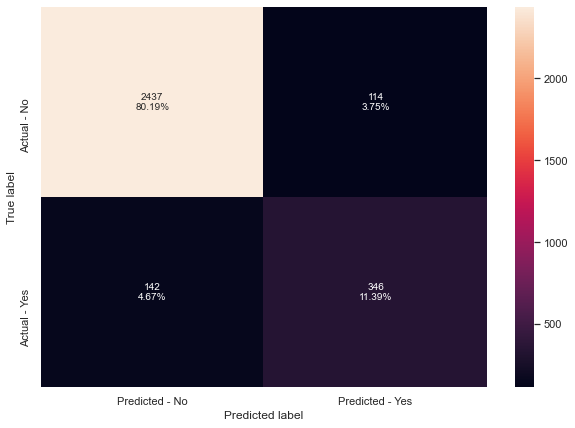

In [263]:
#Calculating different metrics
get_metrics_score(bc_tuned1)

#Creating confusion matrix
make_confusion_matrix(bc_tuned1,y_test)

## Hyperparameter tuning using RANDOM SEARCH


### 1) Gradient Boosting Model

In [254]:
%%time 

pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)


parameters = {
    "gradientboostingclassifier__n_estimators": np.arange(50,200,25),
    "gradientboostingclassifier__learning_rate": [0.1, 0.2, 0.05, 1],
    "gradientboostingclassifier__max_features":[0.8,0.9,1]
}


scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
rand_cv = RandomizedSearchCV(estimator = pipe, param_distributions = parameters, n_iter=50,scoring=scorer,cv=5)
rand_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(rand_cv.best_params_,rand_cv.best_score_))


Best parameters are {'gradientboostingclassifier__n_estimators': 150, 'gradientboostingclassifier__max_features': 0.8, 'gradientboostingclassifier__learning_rate': 0.2} with CV score=0.8893616199088029:
Wall time: 4min 13s


In [256]:
# Creating new pipeline with best parameters
gbc_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        n_estimators=150,
        max_features = 0.8,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_features=0.8,
                                            n_estimators=150,
                                            random_state=1))])

Accuracy on training set :  0.9932279909706546
Accuracy on test set :  0.9693978282329714
Recall on training set :  0.9736611062335382
Recall on test set :  0.8668032786885246
Precision on training set :  0.9840283939662822
Precision on test set :  0.9379157427937915
F1-Score on training set :  0.9788172992056487
F1-Score on test set :  0.9009584664536742


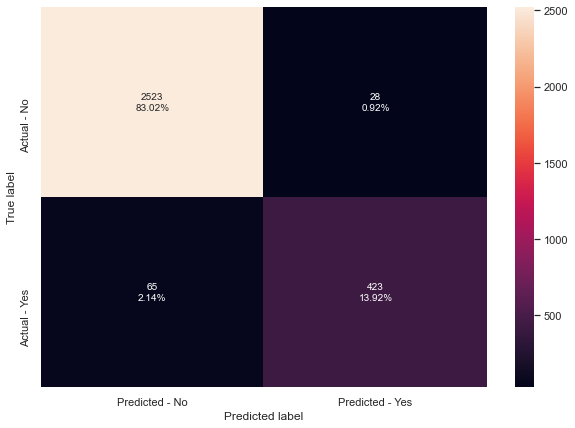

In [257]:
# Calculating different metrics
get_metrics_score(gbc_tuned2)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned2, y_test)

### 2) AdaBoost Model

In [237]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 100, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8779503825643404:
Wall time: 6min 52s


In [238]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9964729119638827
Accuracy on test set :  0.9677525501809806
Recall on training set :  0.9868305531167691
Recall on test set :  0.8872950819672131
Precision on training set :  0.9911816578483245
Precision on test set :  0.9096638655462185
F1-Score on training set :  0.9890013198416191
F1-Score on test set :  0.8983402489626556


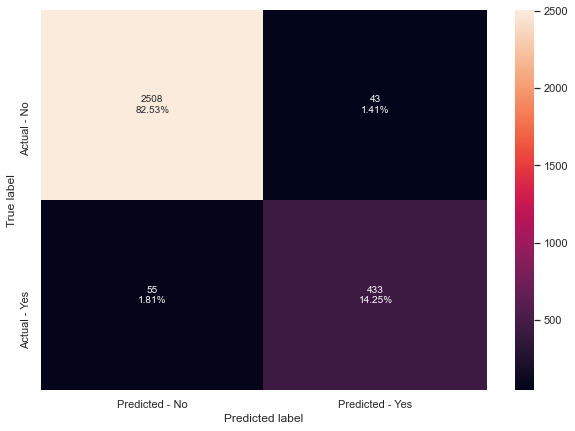

In [239]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

### 3) Bagging Classifier Model

In [265]:
%%time 

# Choose the type of classifier. 
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Grid of parameters to choose from
parameters = {'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
rand_cv = RandomizedSearchCV(estimator=pipe, param_distributions=parameters, n_iter = 50,scoring=scorer, cv=5)
rand_cv.fit(X_train, y_train)


print("Best Parameters:{} \nScore: {}".format(rand_cv.best_params_, rand_cv.best_score_))

Best Parameters:{'baggingclassifier__n_estimators': 50, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__max_features': 0.9} 
Score: 0.8463366566195223
Wall time: 1min 46s


In [266]:
# Creating new pipeline with best parameters
bc_tuned2 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_samples=0.9,
        max_features=0.9,
        n_estimators=50,
        random_state=1,
    ),
)

# Fit the model on training data
bc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9, max_samples=0.9,
                                   n_estimators=50, random_state=1))])

Accuracy on training set :  0.9997178329571106
Accuracy on test set :  0.9595261599210266
Recall on training set :  0.9982440737489026
Recall on test set :  0.8176229508196722
Precision on training set :  1.0
Precision on test set :  0.9214780600461894
F1-Score on training set :  0.9991212653778558
F1-Score on test set :  0.8664495114006515


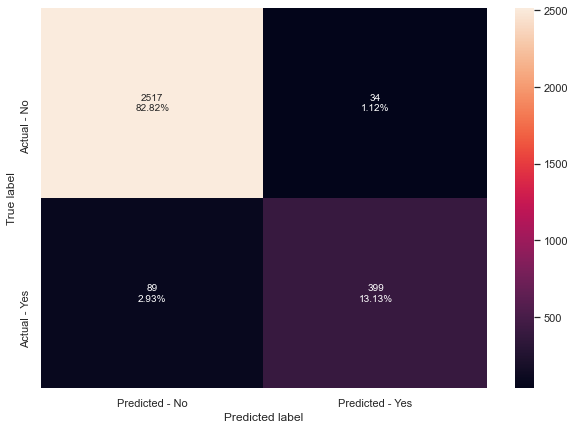

In [268]:
#Calculating different metrics
get_metrics_score(bc_tuned2)

#Creating confusion matrix
make_confusion_matrix(bc_tuned2,y_test)

## MODEL PERFORMANCE EVALUATION
## Comparison of the Hypertuned Models (Grid and Random Search)


In [269]:
# defining list of model
models = [gbc_tuned1,gbc_tuned2, abc_tuned1,abc_tuned2,bc_tuned1,bc_tuned2]

# defining empty lists to add train and test results
train_acc = []
test_acc = []
train_recall = []
test_recall = []
train_precision = []
test_precision = []
train_f1 = []
test_f1 = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    train_acc.append(j[0])
    test_acc.append(j[1])
    train_recall.append(j[2])
    test_recall.append(j[3])
    train_precision.append(j[4])
    test_precision.append(j[5])
    train_f1.append(j[6])
    test_f1.append(j[7])

In [270]:
comparison_frame3 = pd.DataFrame({'Model':['Gradient Boost w/ Grid Search','Gradient Boost w/ Random Search',
                                          'Adaboost w/ Grid Search','Adaboost w/ Random Search','Bagging Classifier w/ Grid Search','Bagging Classifier w/ Random Search'], 
                                          'Train_Accuracy': train_acc,'Test_Accuracy': test_acc,
                                          'Train_Recall':train_recall,'Test_Recall':test_recall,
                                          'Train_Precision':train_precision,'Test_Precision':test_precision,
                                          'Train_F1':train_f1,'Test_F1':test_f1}) 

#Sorting models in decreasing order of test recall
comparison_frame3

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Gradient Boost w/ Grid Search,0.991817,0.970385,0.964881,0.868852,0.983885,0.942222,0.974291,0.904051
1,Gradient Boost w/ Random Search,0.993228,0.969398,0.973661,0.866803,0.984028,0.937916,0.978817,0.900958
2,Adaboost w/ Grid Search,1.000000,0.959855,1.000000,0.842213,1.000000,0.901316,1.000000,0.870763
3,Adaboost w/ Random Search,0.996473,0.967753,0.986831,0.887295,0.991182,0.909664,0.989001,0.898340
4,Bagging Classifier w/ Grid Search,0.918454,0.915762,0.718174,0.709016,0.760930,0.752174,0.738934,0.729958
5,Bagging Classifier w/ Random Search,0.999718,0.959526,0.998244,0.817623,1.000000,0.921478,0.999121,0.866450


<u>OBSERVATIONS</u>
- Adaboost with Random Search has the best recall value of all the models.
- Most of the models show very promising recall values on tuning.
- For all models, the recall score increased on tuning.
- We can still work on Improving the recall scores across all the models.
- Precision and Accuracy values are mostly high across the models so it is not imperative to work on improving them.

<b> TIME TAKEN </b><br>
- Gradient Boost w/ Grid Search : 17 mins 41 s
- Gradient Boost w/ Random Search : 4 min 31 s
- Adaboost w/ Grid Search : 2 min 36 s
- Adaboost w/ Random Search : 6 min 52 s
- Bagging Classifier w/ Grid Search : 2 min 33 s
- Bagging Classifier w/ Random Search : 1 min 46s


Judging by Time Taken; BAGGING CLASSIFIER WITH RANDOM SEARCH is the best model with lowest computation time. <br>
Overall; Randomized Search takes FAR LESS TIME than Grid Search

<b> TEST RECALL </b><br>
Judging by Test_Recall we have ADABOOST WITH RANDOM SEARCH as the best model with the highest Test_Recall


### Feature Importance of the Best Model
ADABOOST WITH RANDOM SEARCH

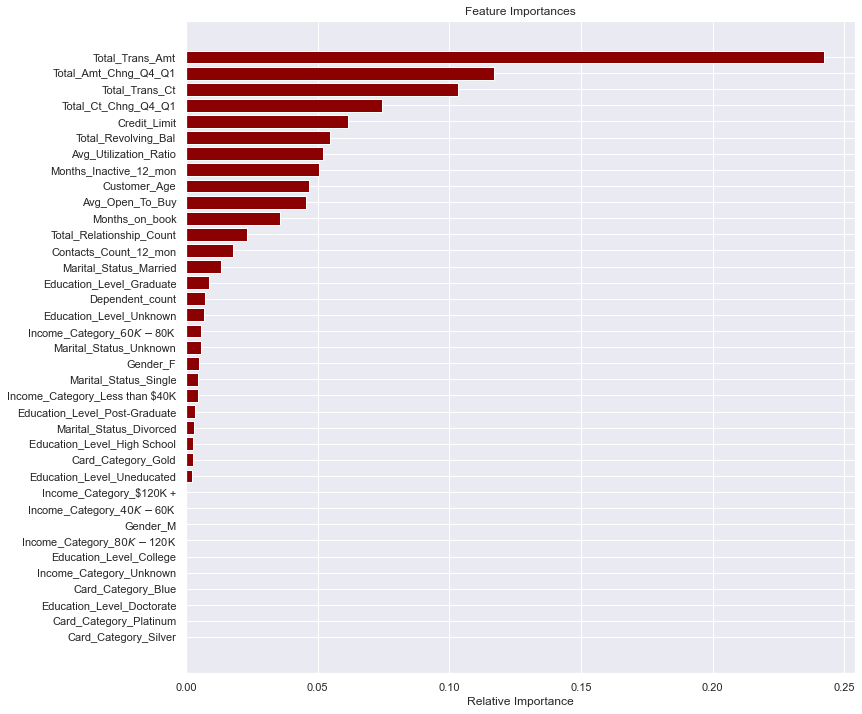

In [274]:
feature_names = X_train.columns
importances = abc_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="darkred", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

For the Adaboost with Random Search Model, the features with the highest importance are :<br>
<b>Total_Trans_Amt  >  Total_Amt_Chng_Q4_Q1  >  Total_Trans_Ct  >  Total_Ct_Chng_Q4_Q1</b>

## Actionable Insights & Recommendations

- Targeted Marketing with offers to encourage more transactions based on Transaction Amount of customers.
- Incentives for customers with more dependents.
- Customers with longer and more relationships with the bank can be given added benefits to encourage them to stay.
- Based on the amount spent by customers, a small percentage of cashback can be given.
- Smoothing the Contact process with the bank so as to ease the process for the customer. This will also ensure that they do not chnage banks or termintae services due to poor service. 
- Targeted marketing showing best places to spend based on the types of cards that people hold. Better cards give access to better facilities. 
- Increasing credit limit for customers with longer relationship with the bank.
